# The Neural Dynamics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

## Import Libraries and Setting Path Variables

Make sure that all the libraries specified in environment.yaml are installed (see [pip](https://packaging.python.org/en/latest/tutorials/installing-packages/) documentation for more info). 

**~The structure of the directory should be:~**
```
ROOT
│
└─data
│  │
│  └─raw
│  |  │   
│  │  └─data_<TASK>
│  │  │   
│  │  └─<MONKEY>_<YYYYMMDD>_g<d>             
│  │     │    
│  │     └─<MONKEY>_<YYYYMMDD>_g<d>_t<d>.meta
│  │     │    
│  │     └─<MONKEY>_<YYYYMMDD>_g<d>_t<d>.bin   
│  │ 
│  └─processed
│  │  │   
│  │  └─data_<TASK>
│  │ 
│  └─_fractals
│     │   
│     └─<YYYYMMDD>
│
└─tasks
  │
  └─<EXPERIMENT>
	  │   
	  └─<TASK>  
		  │   
		  └─<videos>     

```

**MACBOOK:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

**PC:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

In [1]:
# Move files from acquisition computer to Google Drive
!bash utilities/move_files.sh Aragorn 240506

Current directory is:
  /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/9. Reward_Airpuff_Generalization
Target path is:
  data_Probabilistic_Reward_Airpuff_Generalization
Searching for Aragorn for 240506
  Copying : 240506_Aragorn_generalization.h5
  Copied  : 240506_Aragorn_generalization.h5
  Total number of files moved: 1
Fractal folder is: 20240506
  Copied fractal folder to all fractals folder
Done.


In [144]:
%load_ext autoreload
%autoreload 2
import os
import re
import sys
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pprint import pprint
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

# Custom classes
from classes.Session_Path import SessionPath
from classes.Session import Session
# pandas options
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

# See tree branch above to set <ROOT>, <EXPERIMENT>
ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
# TASK = Probabilistic_Reward_Airpuff_5x2
# TASK = 'Probabilistic_Reward_Airpuff_Choice'
TASK = 'Probabilistic_Reward_Airpuff_Generalization' 

path_obj = SessionPath(ROOT, EXPERIMENT, TASK)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Raw Data Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Generalization
  Number of Total Files  : 27
  Monkey: Bear
    Number of Bear Files : 4
    Earliest Date    : 240207
    Most Recent Date : 240402
  Monkey: Aragorn
    Number of Aragorn Files : 21
    Earliest Date    : 240110
    Most Recent Date : 240506
No video folder found for task: Probabilistic_Reward_Airpuff_Generalization
Pulling '.h5' files...
  Complete: 25 '.h5' files pulled


***
## Specifying Session and Analyses Parameters
Choose the date(s) and monkey(s) that you'd like to include in your analysis. 
> `reprocess_data` <br>
> * `True` : generates (or regenerates) the session_df DataFrame from `data/raw` data <br>
> * `False` : loads the pickled session_df DataFrame from the `data/processed` data directory

> `save_df` <br>
> * `True` : pickles the generated session_df DataFrame and saves it in the `data/processed` data directory
> * `False` : does not pickle the session_df DataFrame

> `combine_dates` <br>
> * `True` : runs all analyses on a combined DataFrame and saves figures for all sessions
> * `False` : does not combine analyses and generates new figures for each date

In [145]:
# Custom modules
from config import preprocess_helper

# Specifying date/monkey/task
start_date = '2024-04-11' # default = '2024-04-16'
end_date = '2024-04-11' # default = '2024-04-26'
monkey_input = 'Aragorn' # ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = False
save_df =  True
combine_dates =  True

# Parse data
session_df, session_obj, error_dict, behavioral_code_dict\
	= preprocess_helper.preprocess_data(path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			TASK,
																			reprocess_data,
																			save_df,
																			combine_dates)

session_df_correct = session_df[session_df['correct'] == 1]


Files uploaded from processed folder

Pickled Files:
['240411_Aragorn_Probabilistic_Reward_Airpuff_5x2_behave.pkl']
Creating Session Objects...
Lick threshold: 3.77 mV
  Min Values (X,Y): (-285.767,-245.712)
  Max Values (X,Y): (345.383,203.511)
  Reward Mag: 1.0
    Reward Drops: 10.0
    Reward Frequency: 1.0
    Reward Length: 220.0
  Reward Mag: 0.5
    Reward Drops: 5.0
    Reward Frequency: 1.0
    Reward Length: 200.0
  Reward Mag: 0.0
    Reward Drops: 0.0
    Reward Frequency: 0.0
    Reward Length: 0.0
  Airpuff Mag: 1.0
    Airpuff Magnitude: 1.0
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.5
    Airpuff Magnitude: 0.5
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.0
    Airpuff Magnitude: 0.0
    Airpuff Frequency: 0.0
Looking for images from: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/_fractals/20240411
  4 images found.
 Saving figures to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/figure

### View DataFrame Headers

Peek into the session_df DataFrame to see the fields included.

In [162]:
pd.set_option('display.max_columns', None)
session_df.head(10)

date  session_num  subject  trial_num  block  condition  correct  error  \
0  240411            0  aragorn          1      1          1        0      1   
1  240411            0  aragorn          2      1          1        1      0   
2  240411            0  aragorn          3      1          1        0      1   
3  240411            0  aragorn          4      1          1        1      0   
4  240411            0  aragorn          5      1          1        0      1   
5  240411            0  aragorn          6      1          1        1      0   
6  240411            0  aragorn          7      1          1        0      1   
7  240411            0  aragorn          8      1          1        1      0   
8  240411            0  aragorn          9      1          1        0      1   
9  240411            0  aragorn         10      1          1        1      0   

   error_type                            behavioral_code_markers  \
0           2                             [9, 100, 101, 113, 18]   
1           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
2           2                             [9, 100, 101, 113, 18]   
3           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
4           2                             [9, 100, 101, 113, 18]   
5           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
6           3                   [9, 100, 101, 102, 103, 113, 18]   
7           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
8           2                             [9, 100, 101, 113, 18]   
9           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   

                               behavioral_code_times stimuli_name_0 x_0_pos  \
0  [5.666199955157936, 2918.1486999150366, 2993.7...           _fix   [0.0]   
1  [1497.7592000504956, 1609.9294000305235, 1659....           _fix   [0.0]   
2  [2187.2758000390604, 2289.402100024745, 2322.5...           _fix   [0.0]   
3  [1465.8317000139505, 1568.6966000357643, 1601....           _fix   [0.0]   
4  [2161.1531000817195, 2269.7486000834033, 2302....           _fix   [0.0]   
5  [1464.3201000289991, 1533.907699980773, 1566.3...           _fix   [0.0]   
6  [5187.510400079191, 5275.677300058305, 5310.09...           _fix   [0.0]   
7  [1465.746800065972, 1535.9025000361726, 1568.4...           _fix   [0.0]   
8  [2208.160800044425, 2291.0405000438914, 2325.0...           _fix   [0.0]   
9  [1465.570200001821, 1536.6674000397325, 1568.4...           _fix   [0.0]   

  y_0_pos stimuli_name_1 x_1_pos y_1_pos stimuli_name_2 x_2_pos y_2_pos  \
0   [0.0]     _fractal_B   [0.0]   [0.0]     _fractal_B   [0.0]   [0.0]   
1   [0.0]     _fractal_A   [0.0]   [0.0]     _fractal_A   [0.0]   [0.0]   
2   [0.0]     _fractal_D  [-7.0]   [0.0]     _fractal_A   [7.0]   [0.0]   
3   [0.0]     _fractal_A  [-7.0]   [0.0]     _fractal_D   [7.0]   [0.0]   
4   [0.0]     _fractal_A   [0.0]   [0.0]     _fractal_A   [0.0]   [0.0]   
5   [0.0]     _fractal_C   [0.0]   [0.0]     _fractal_C   [0.0]   [0.0]   
6   [0.0]     _fractal_C  [-7.0]   [0.0]     _fractal_A   [7.0]   [0.0]   
7   [0.0]     _fractal_C  [-7.0]   [0.0]     _fractal_A   [7.0]   [0.0]   
8   [0.0]     _fractal_B   [0.0]   [0.0]     _fractal_B   [0.0]   [0.0]   
9   [0.0]     _fractal_D   [0.0]   [0.0]     _fractal_D   [0.0]   [0.0]   

   reward_1  reward_prob_1  reward_mag_1  reward_drops_1  reward_length_1  \
0         1            1.0           0.5             0.0              0.0   
1         1            1.0           1.0            10.0            220.0   
2         0            0.0           0.0             0.0              0.0   
3         1            1.0           1.0            10.0            220.0   
4         1            1.0           1.0             0.0              0.0   
5         0            0.0           0.0             0.0              0.0   
6         0            0.0           0.0             0.0              0.0   
7         0            0.0           0.0            10.0       

***
## Run Analyses

`run_functions` performs all the analyses on session_df.

  perf_by_fractal.png saved.


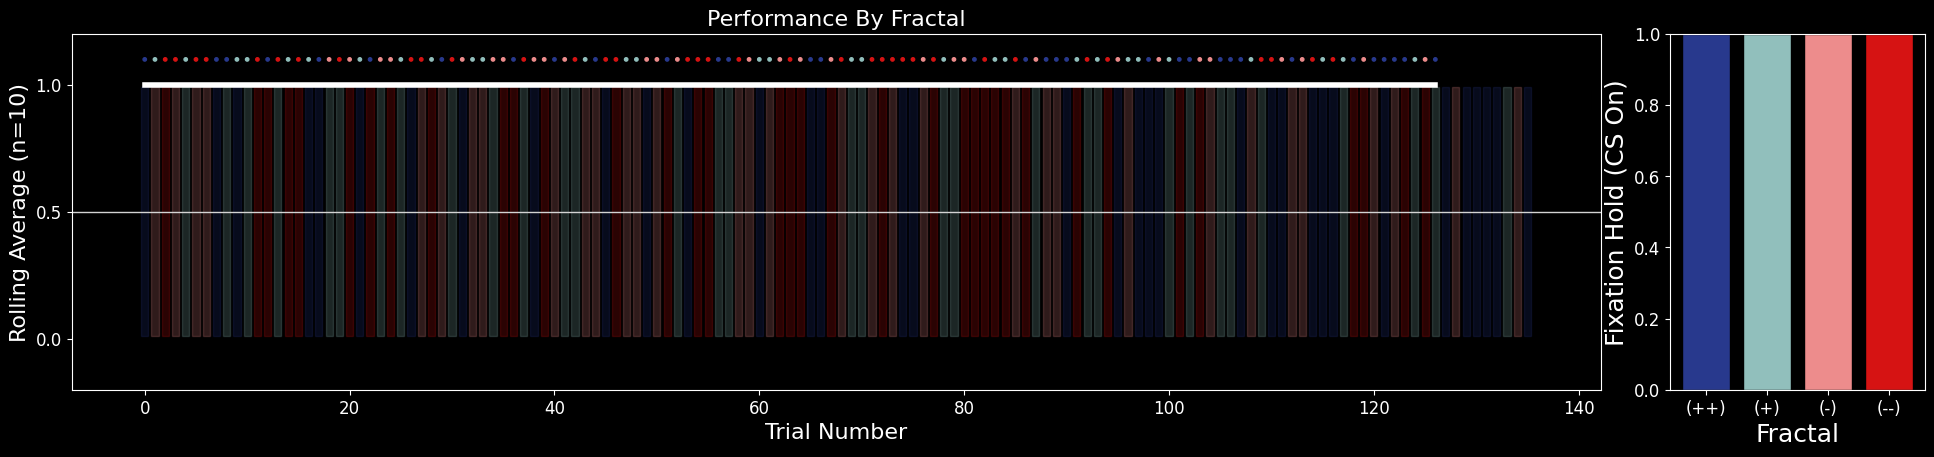

  session_latency.png saved.


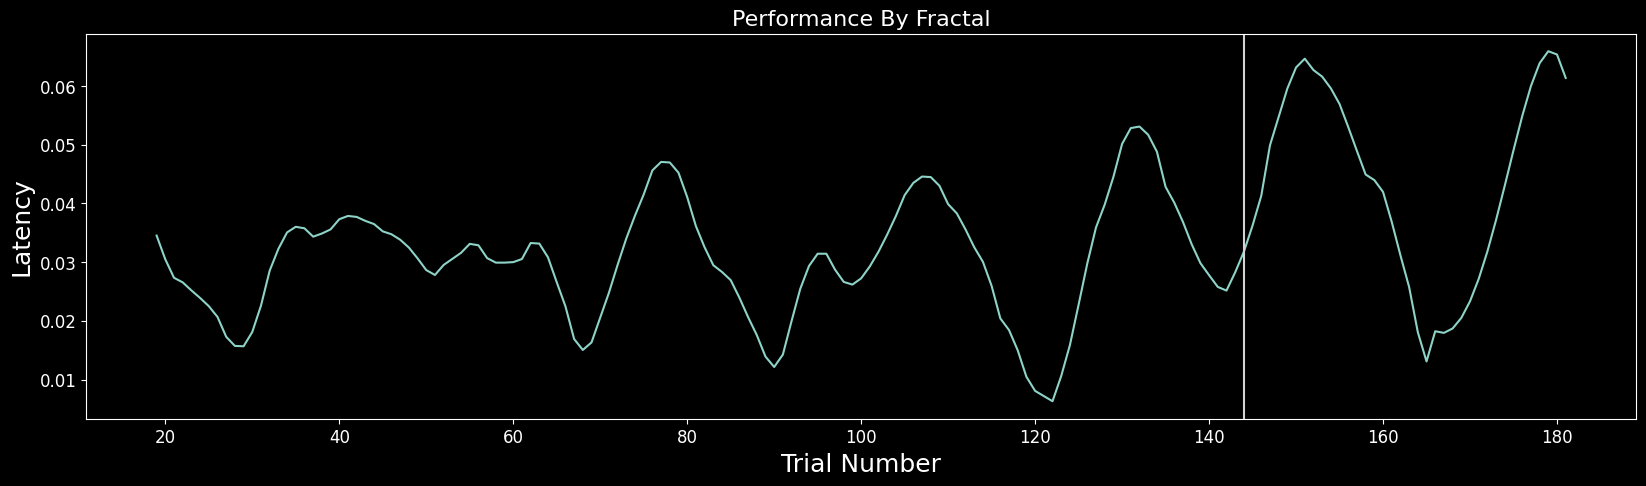

  epoch_hist.png saved.


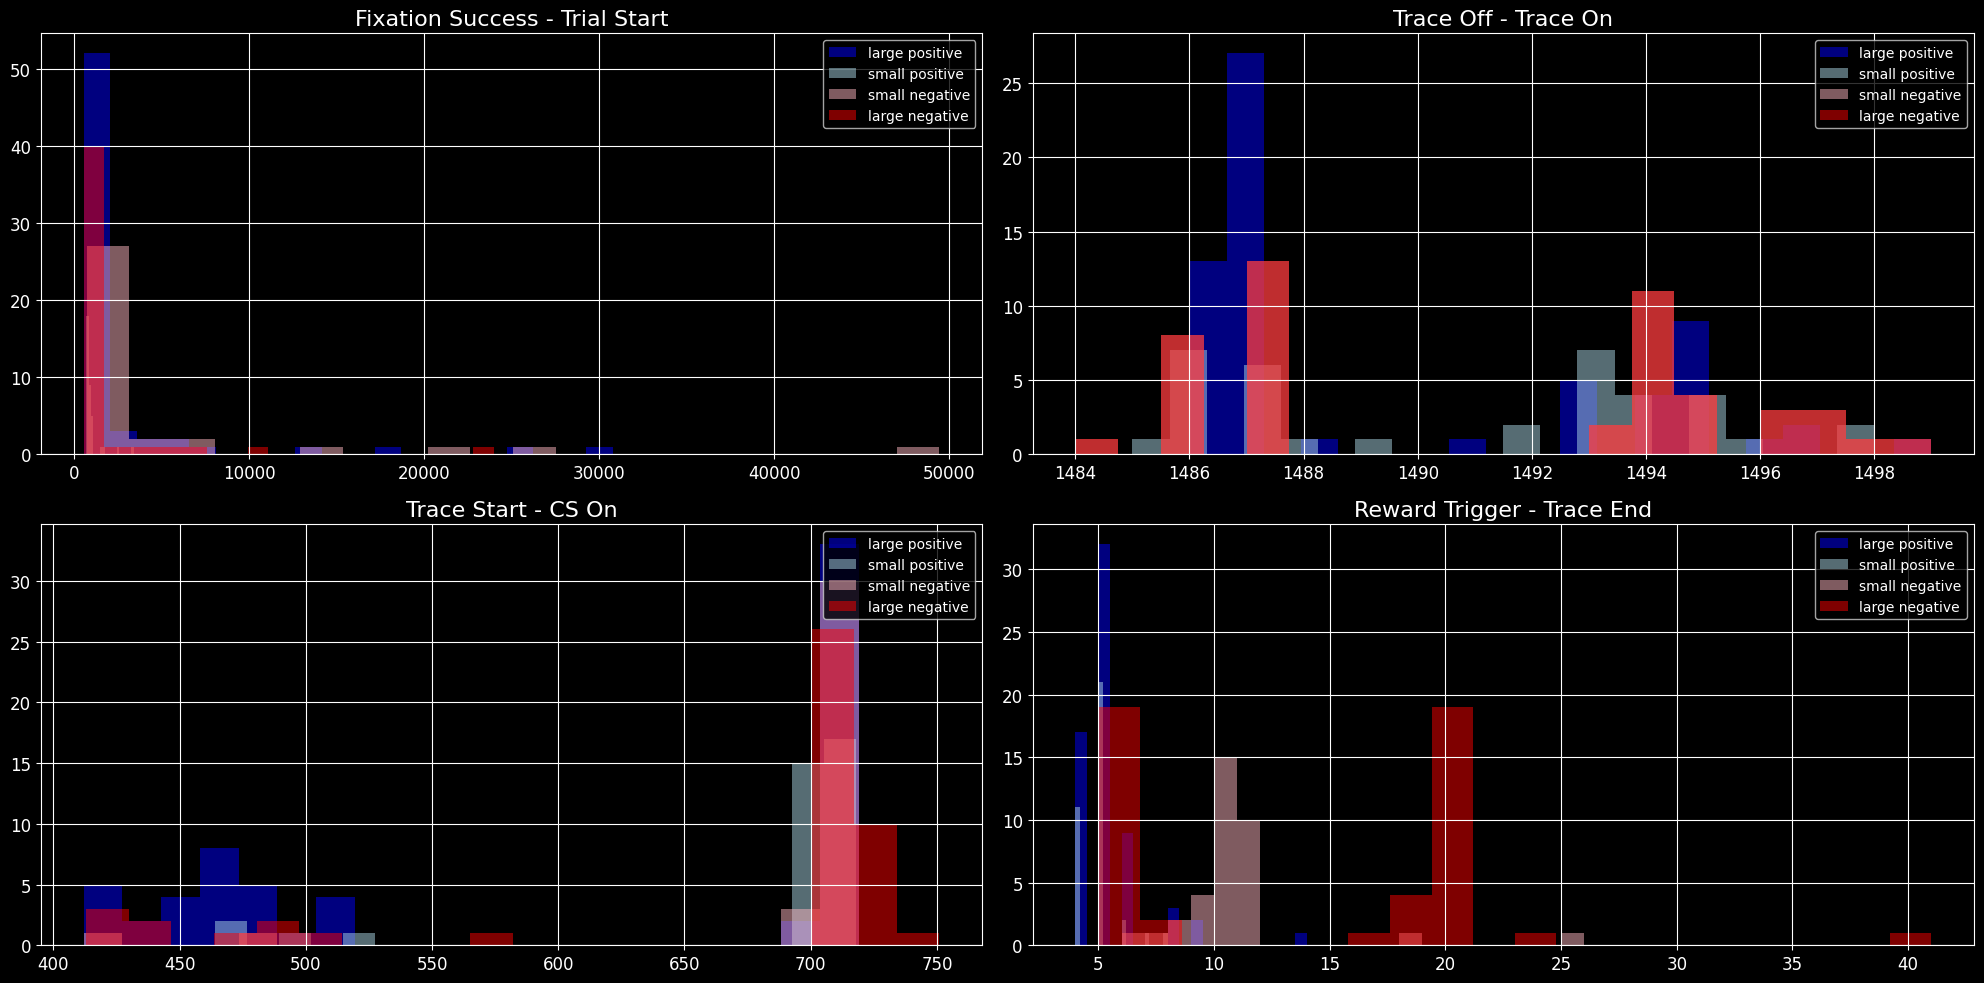

  lick_vs_blink.png saved.
Block: 1
  Valence 1.0: Lick Correlation: -0.326 | Blink Correlation: -0.317
  Valence 0.5: Lick Correlation: 0.037 | Blink Correlation: 0.288
  Valence -0.5: Lick Correlation: -0.145 | Blink Correlation: -0.237
  Valence -1.0: Lick Correlation: -0.564 | Blink Correlation: -0.037
Block: 2
  Valence 1.0: Lick Correlation: -0.937 | Blink Correlation: 0.571


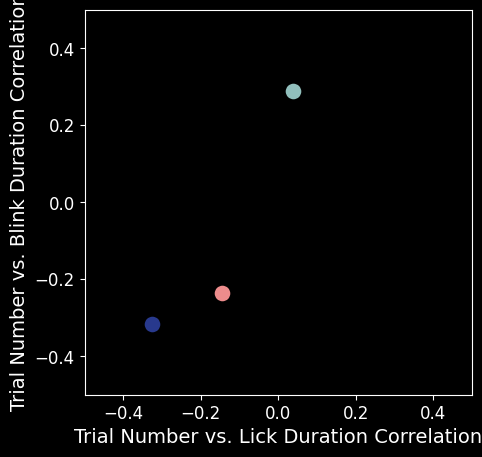

  raster_by_cond_1.svg saved.
  t_test_lick-duration_1.png saved.


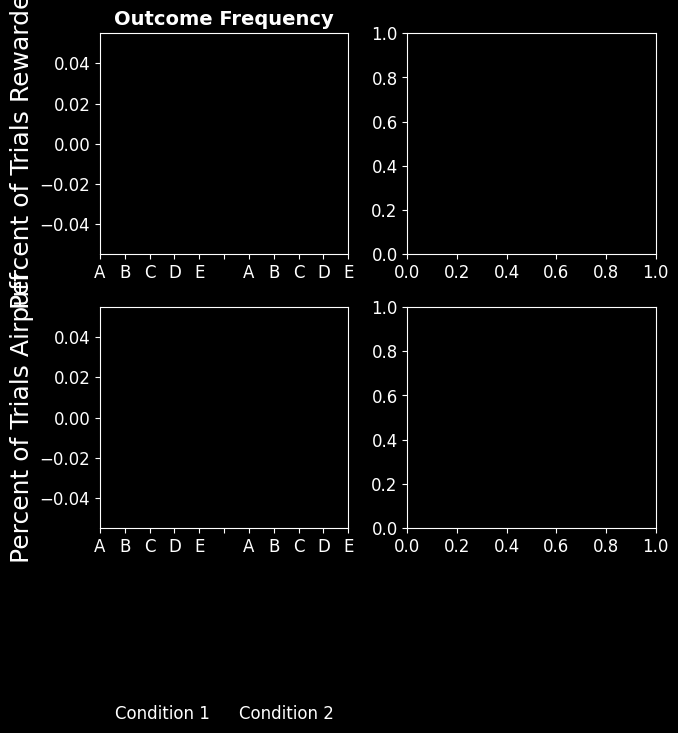

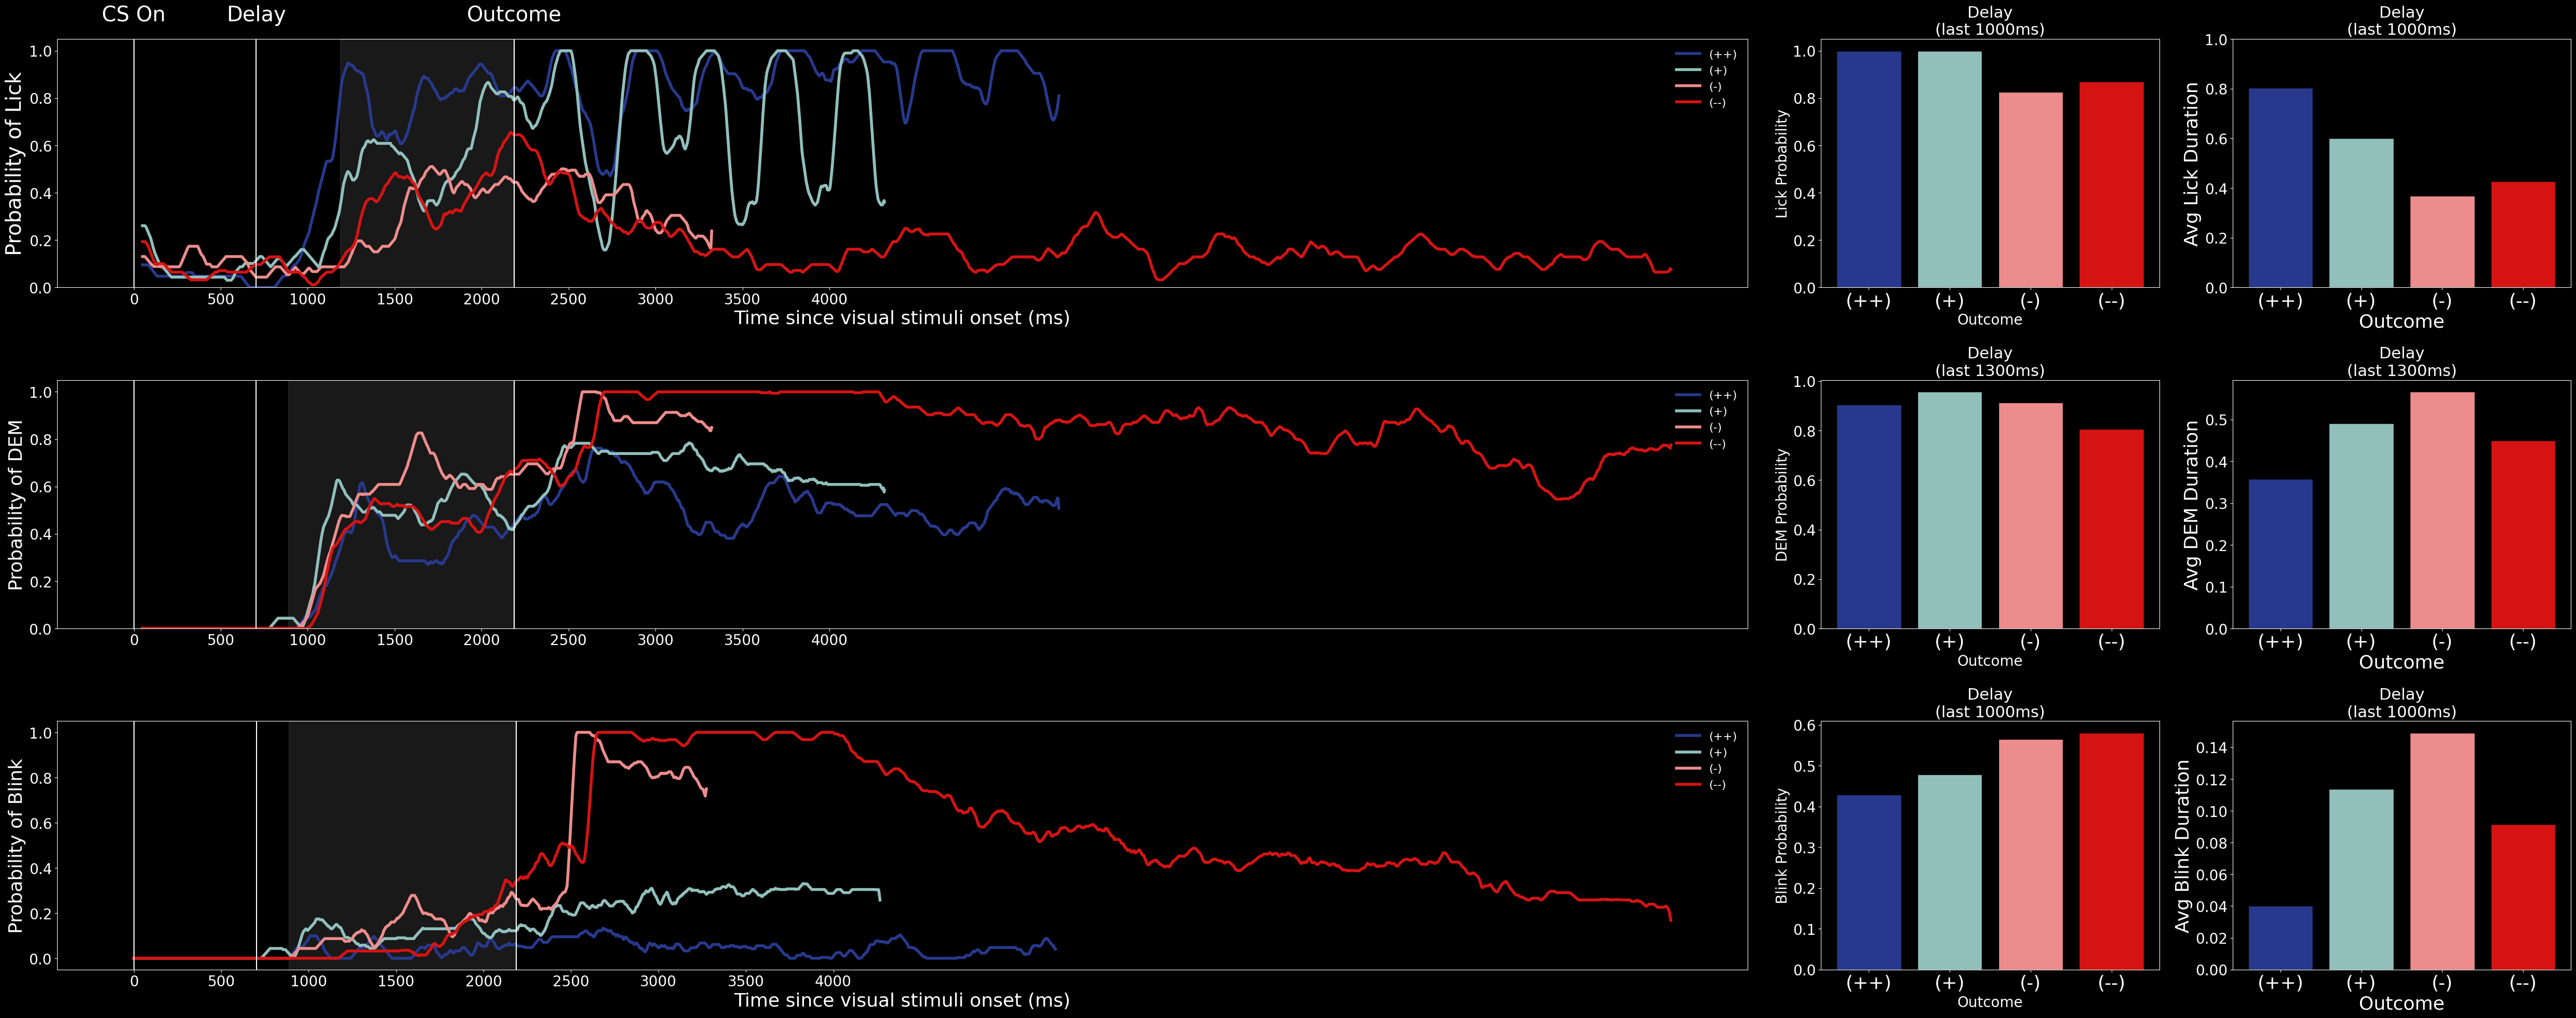

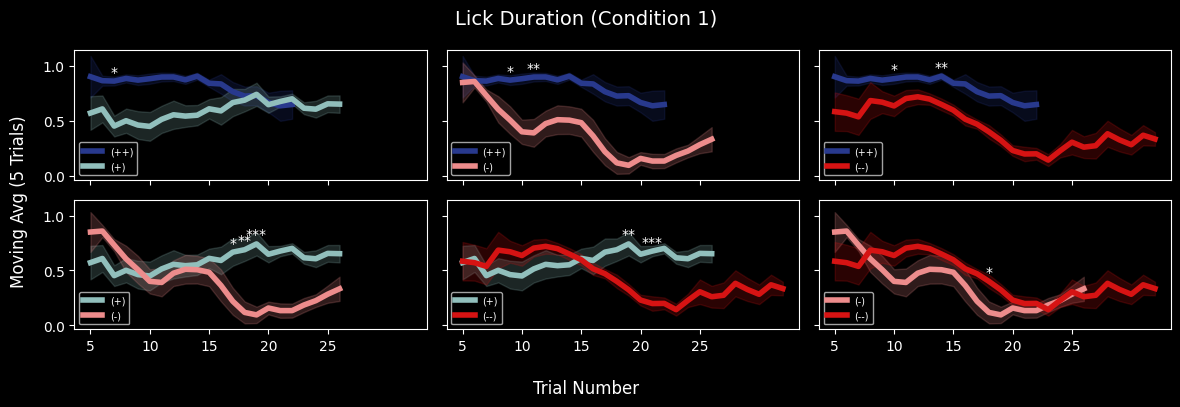

  t_test_DEM-duration_1.png saved.


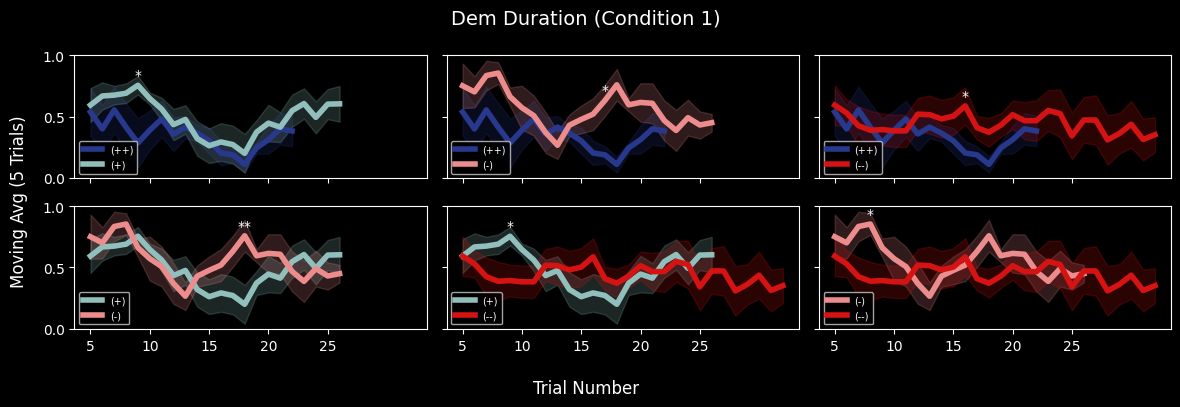

  t_test_blink-duration_1.png saved.


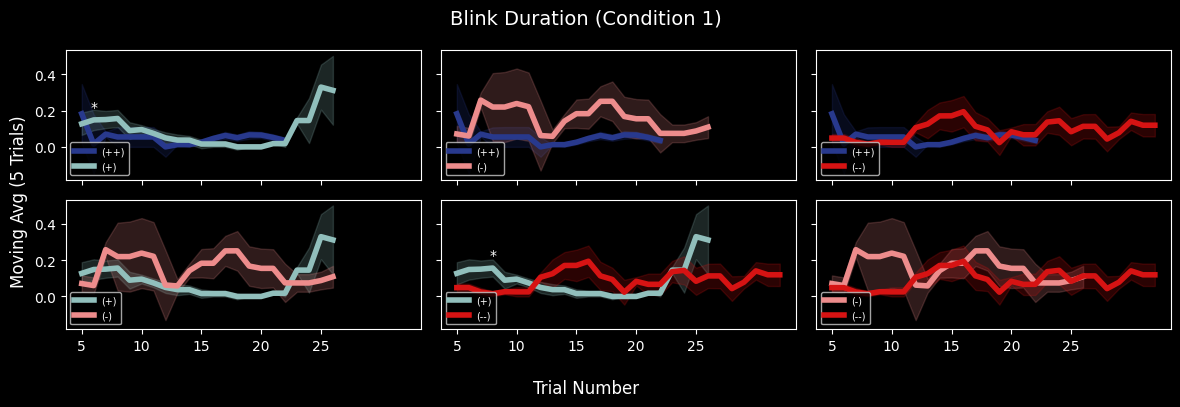

  raster_by_cond_2.svg saved.
  t_test_lick-duration_2.png saved.


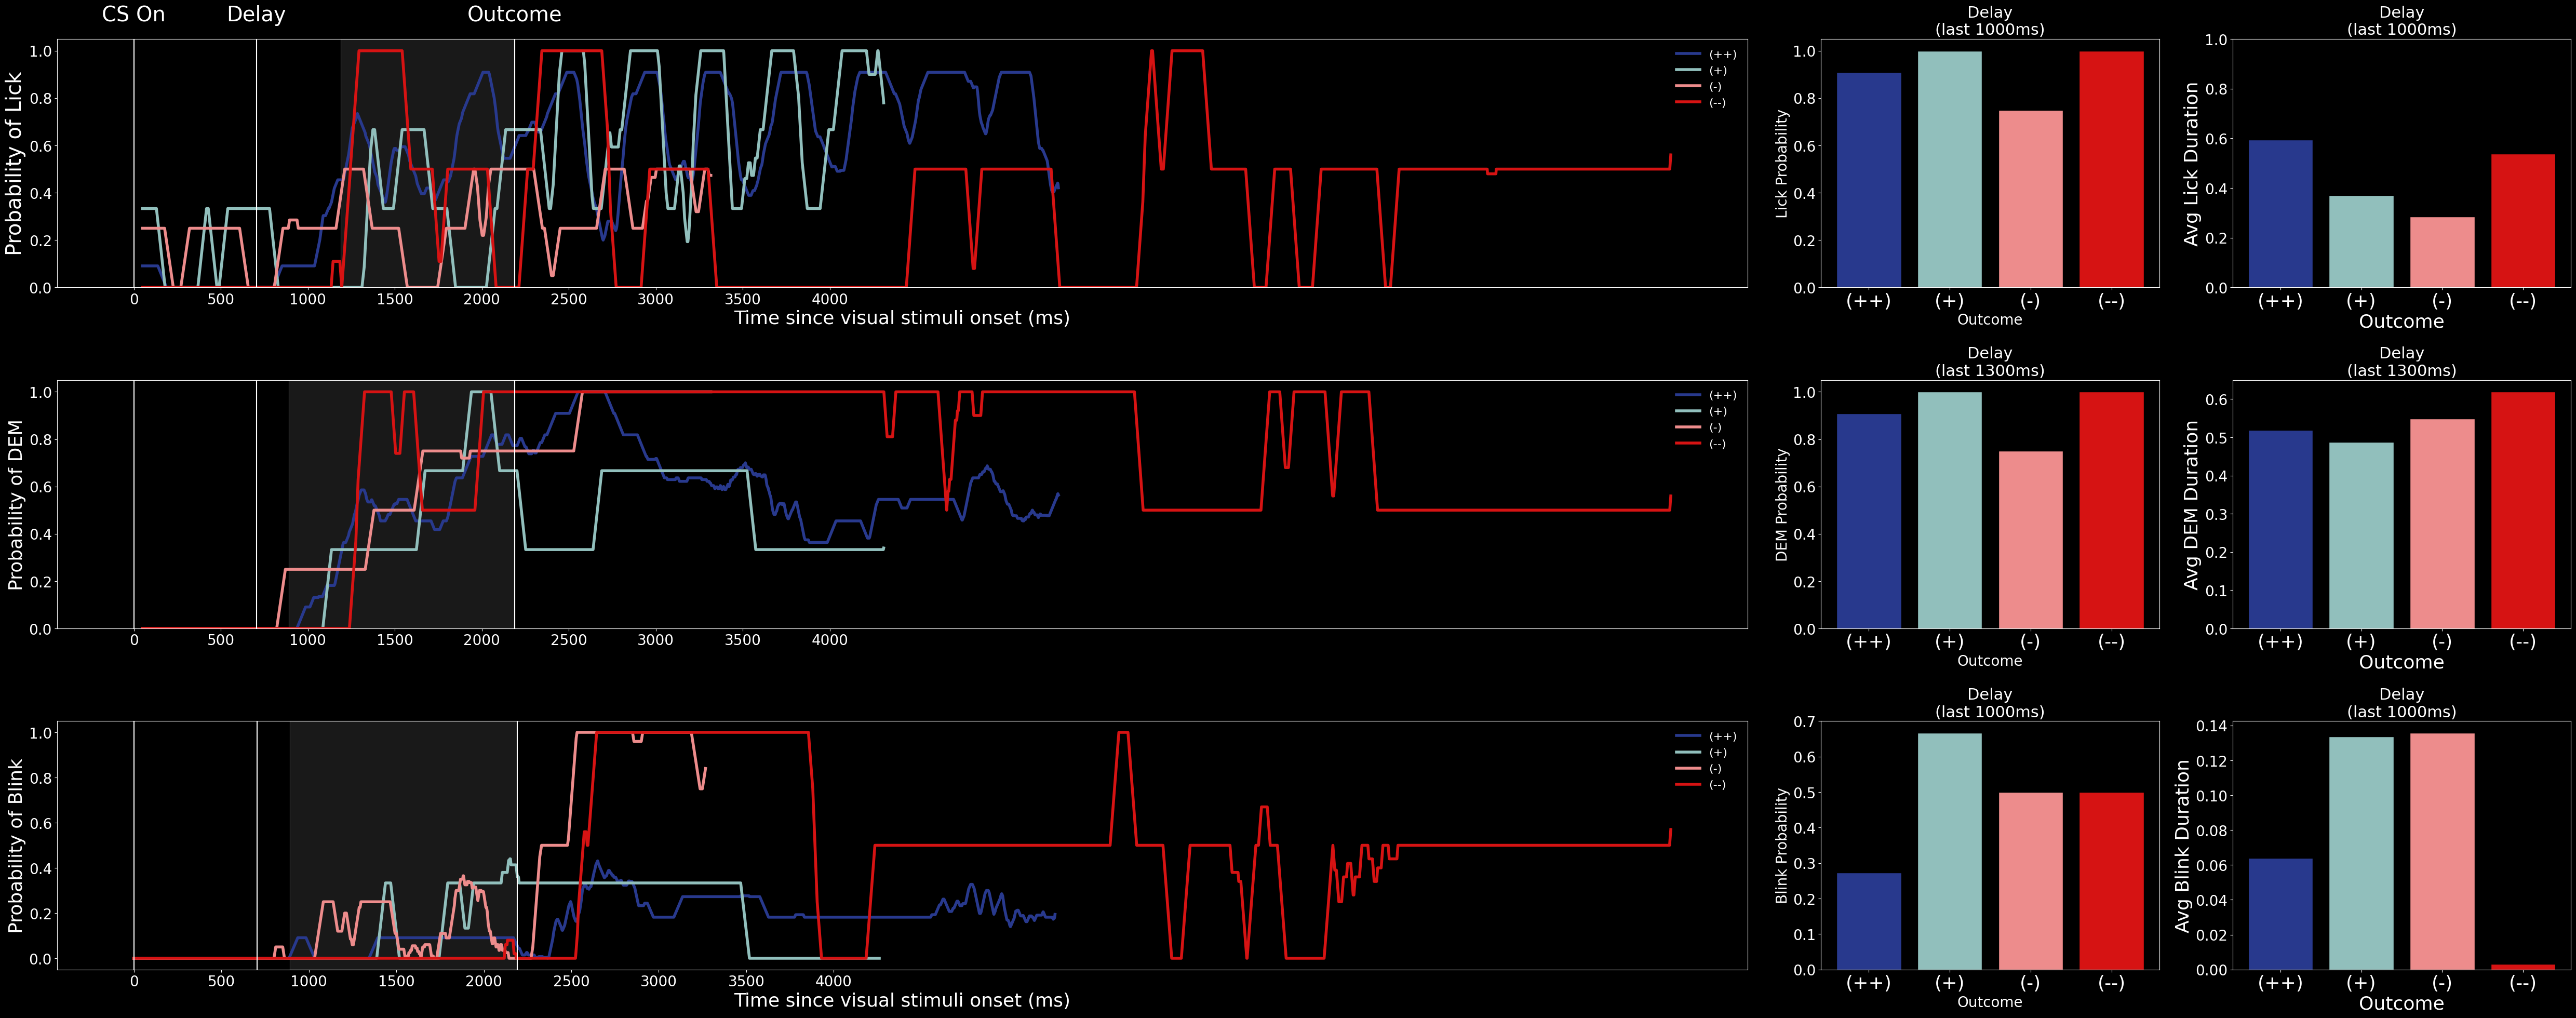

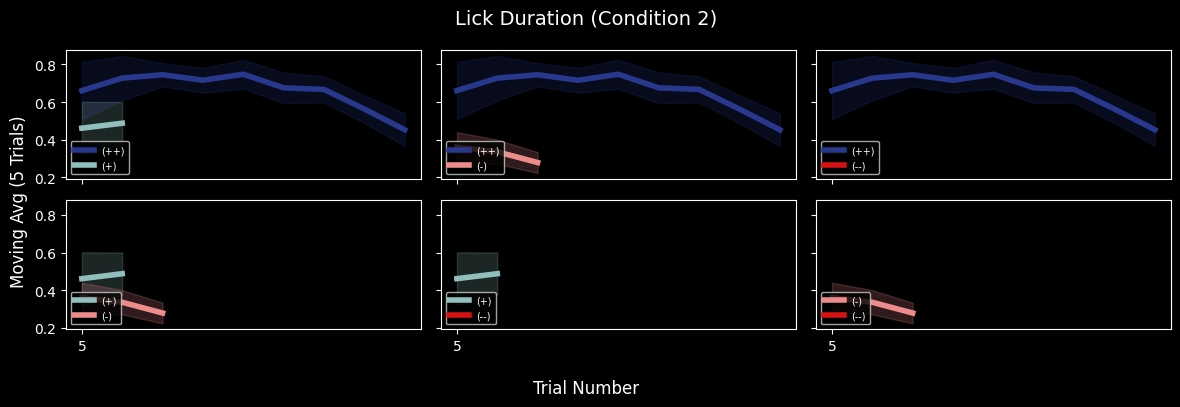

  t_test_DEM-duration_2.png saved.


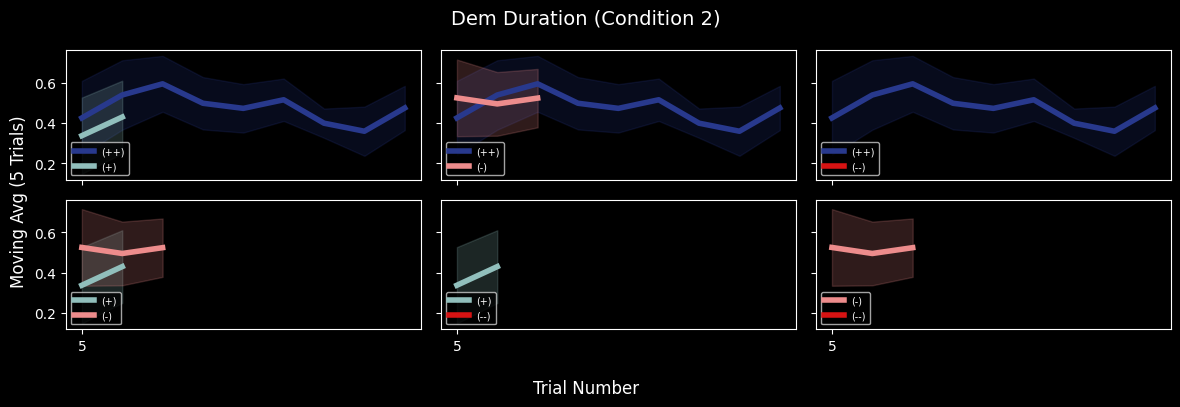

  t_test_blink-duration_2.png saved.


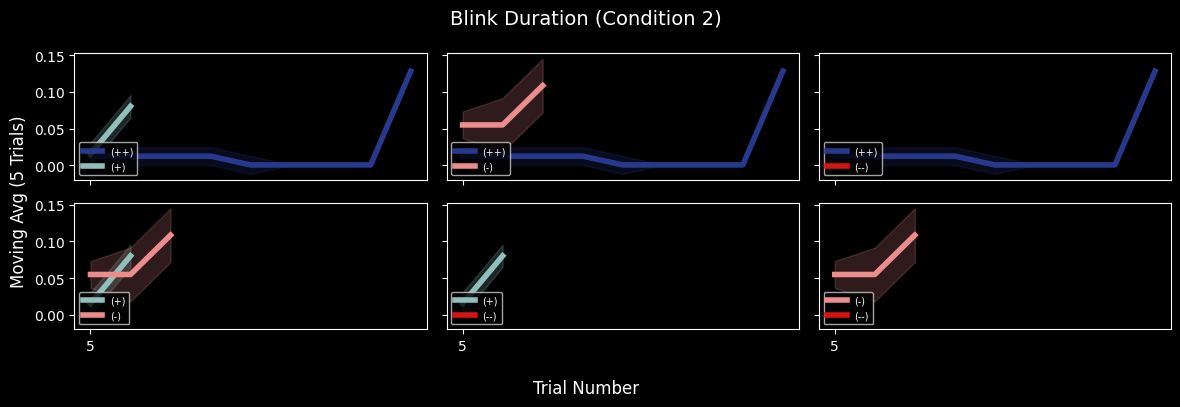

  raster_by_cond_1.svg saved.
 [0.0, 0.5, 1.0] ANOVA 27.36 | P-value: 2.83E-08
  (0, 1) T-value: -6.146 P-value: 7.28E-06 |  Z-value: -5.529 P-value: 3.21E-08
    0 Lick Mean: 0.282 Lick Std: 0.181 Trials: 23
    1 Lick Mean: 0.662 Lick Std: 0.137 Trials: 9
  (0, 2) T-value: -5.916 P-value: 1.29E-05 |  Z-value: -6.406 P-value: 1.50E-10
    0 Lick Mean: 0.282 Lick Std: 0.181 Trials: 23
    2 Lick Mean: 0.746 Lick Std: 0.227 Trials: 12
  (1, 2) T-value: -1.0 P-value: 3.30E-01 |  Z-value: -0.934 P-value: 3.50E-01
    1 Lick Mean: 0.662 Lick Std: 0.137 Trials: 9
    2 Lick Mean: 0.746 Lick Std: 0.227 Trials: 12
  grant_lick.png saved.
 [0.0, 0.5, 1.0] ANOVA 0.084 | P-value: 9.19E-01
  (0, 1) T-value: -0.519 P-value: 6.12E-01 |  Z-value: -0.385 P-value: 7.00E-01
    0 DEM Mean: 0.414 DEM Std: 0.277 Trials: 21
    1 DEM Mean: 0.462 DEM Std: 0.149 Trials: 6
  (0, 2) T-value: 0.104 P-value: 9.18E-01 |  Z-value: 0.106 P-value: 9.16E-01
    0 DEM Mean: 0.414 DEM Std: 0.277 Trials: 21
    2 DEM M

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  lick_blink_hist.png saved.
  lick_blink_cdf.png saved.
Lick
  (--) vs (-): ks_stat: 0.39, p_val: 1.40E-03
  (--) vs (0): ks_stat: 0.59, p_val: 7.01E-08
  (--) vs (+): ks_stat: 0.45, p_val: 1.72E-05
  (-) vs (0): ks_stat: 0.38, p_val: 8.34E-03
  (-) vs (+): ks_stat: 0.21, p_val: 2.88E-01
  (0) vs (+): ks_stat: 0.22, p_val: 2.54E-01
Blink
  (--) vs (-): ks_stat: 0.25, p_val: 9.21E-02
  (--) vs (0): ks_stat: 0.25, p_val: 8.64E-02
  (--) vs (+): ks_stat: 0.2, p_val: 1.88E-01
  (-) vs (0): ks_stat: 0.15, p_val: 7.65E-01
  (-) vs (+): ks_stat: 0.14, p_val: 7.57E-01
  (0) vs (+): ks_stat: 0.1, p_val: 9.74E-01
Total Eye Positions: 66000
Histogram Positions: 62577
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.0025 0.0002 0.     0.     0.     0.     0.    ]
 [0.0027 0.0026 0.0093 0.0007 0.0126 0.0058 0.0012 0.    ]
 [0.0001 0.0039 0.0142 0.1187 0.0711 0.0532 0.0212 0.0013]
 [0.     0.0015 0.0213 0.234  0.1777 0

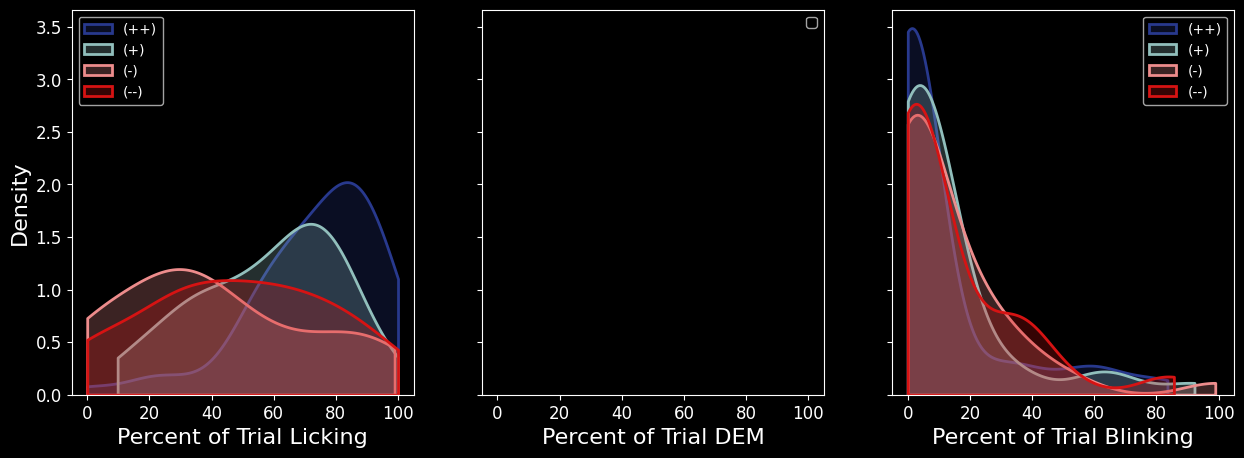

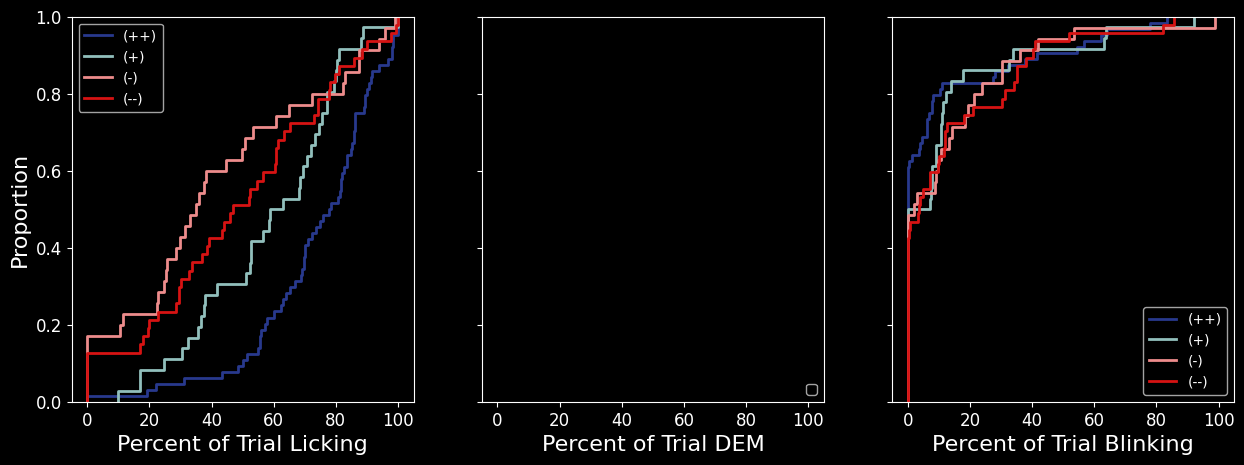

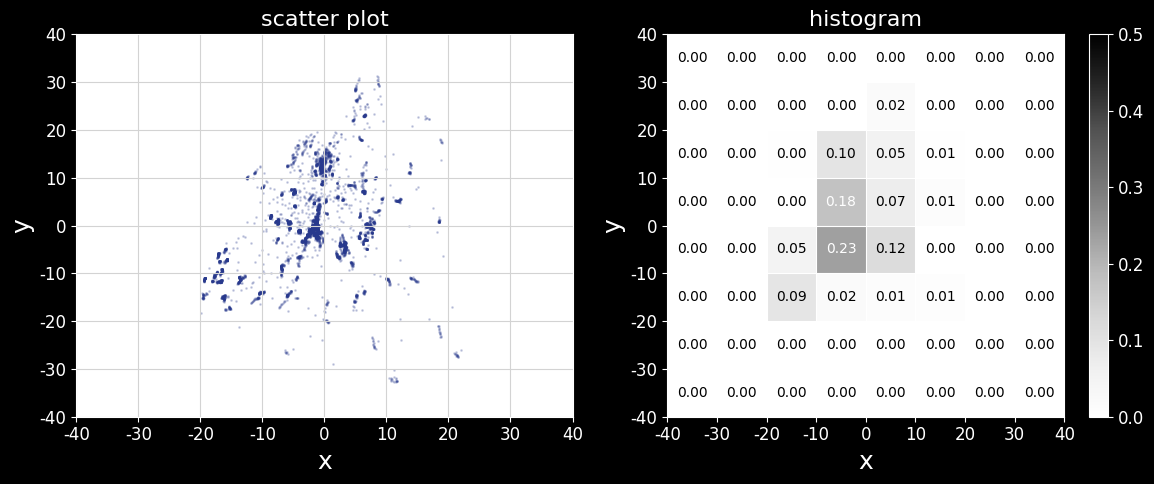

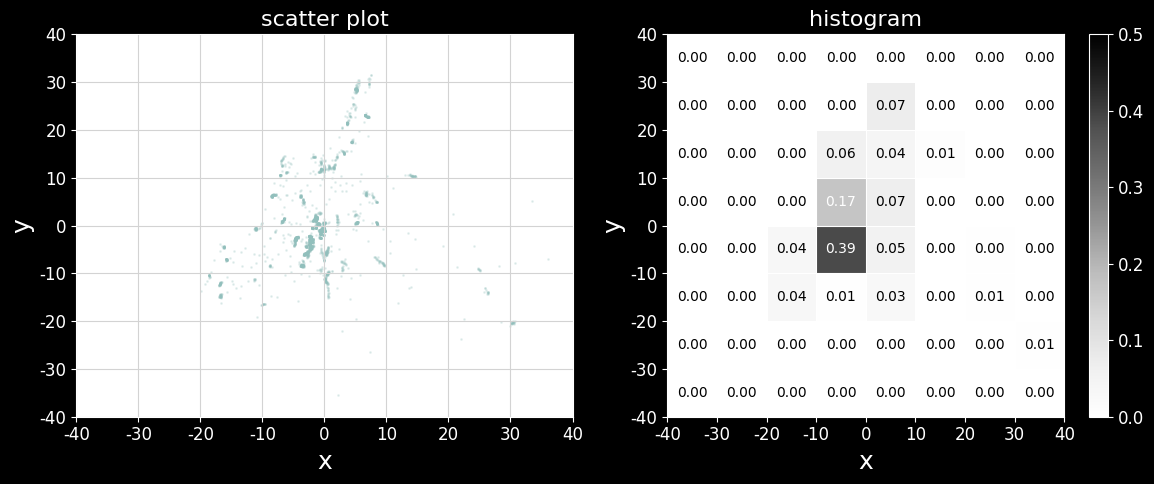

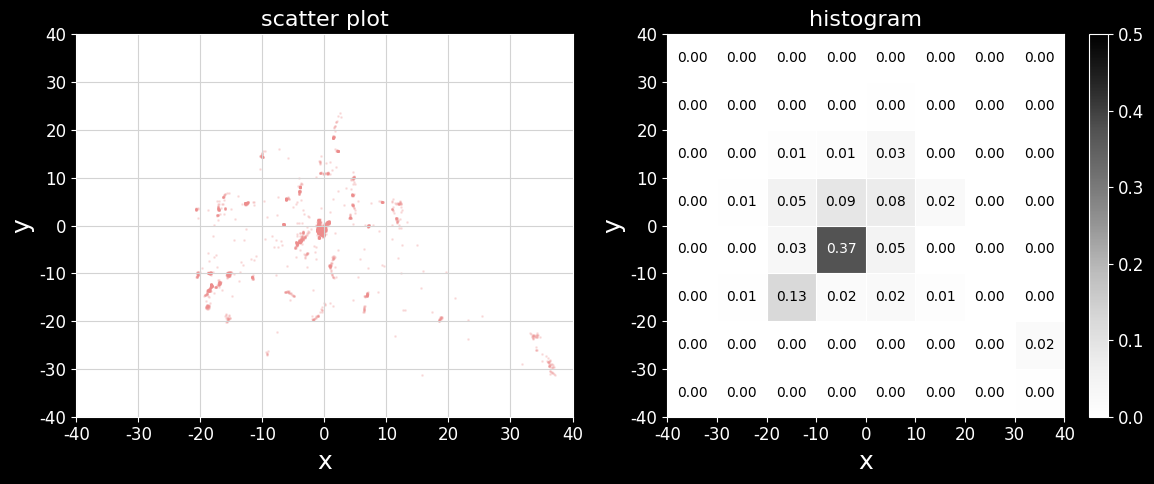

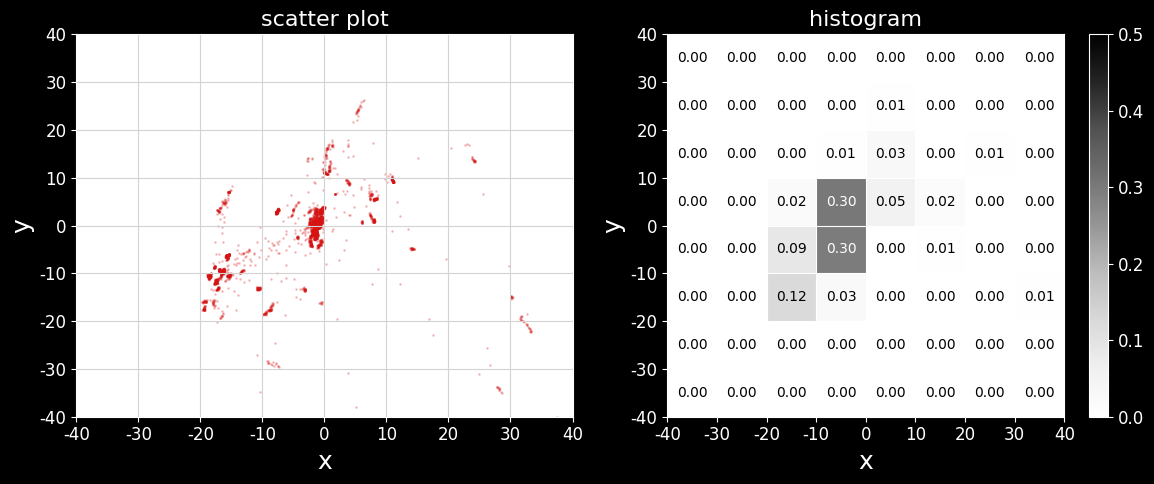

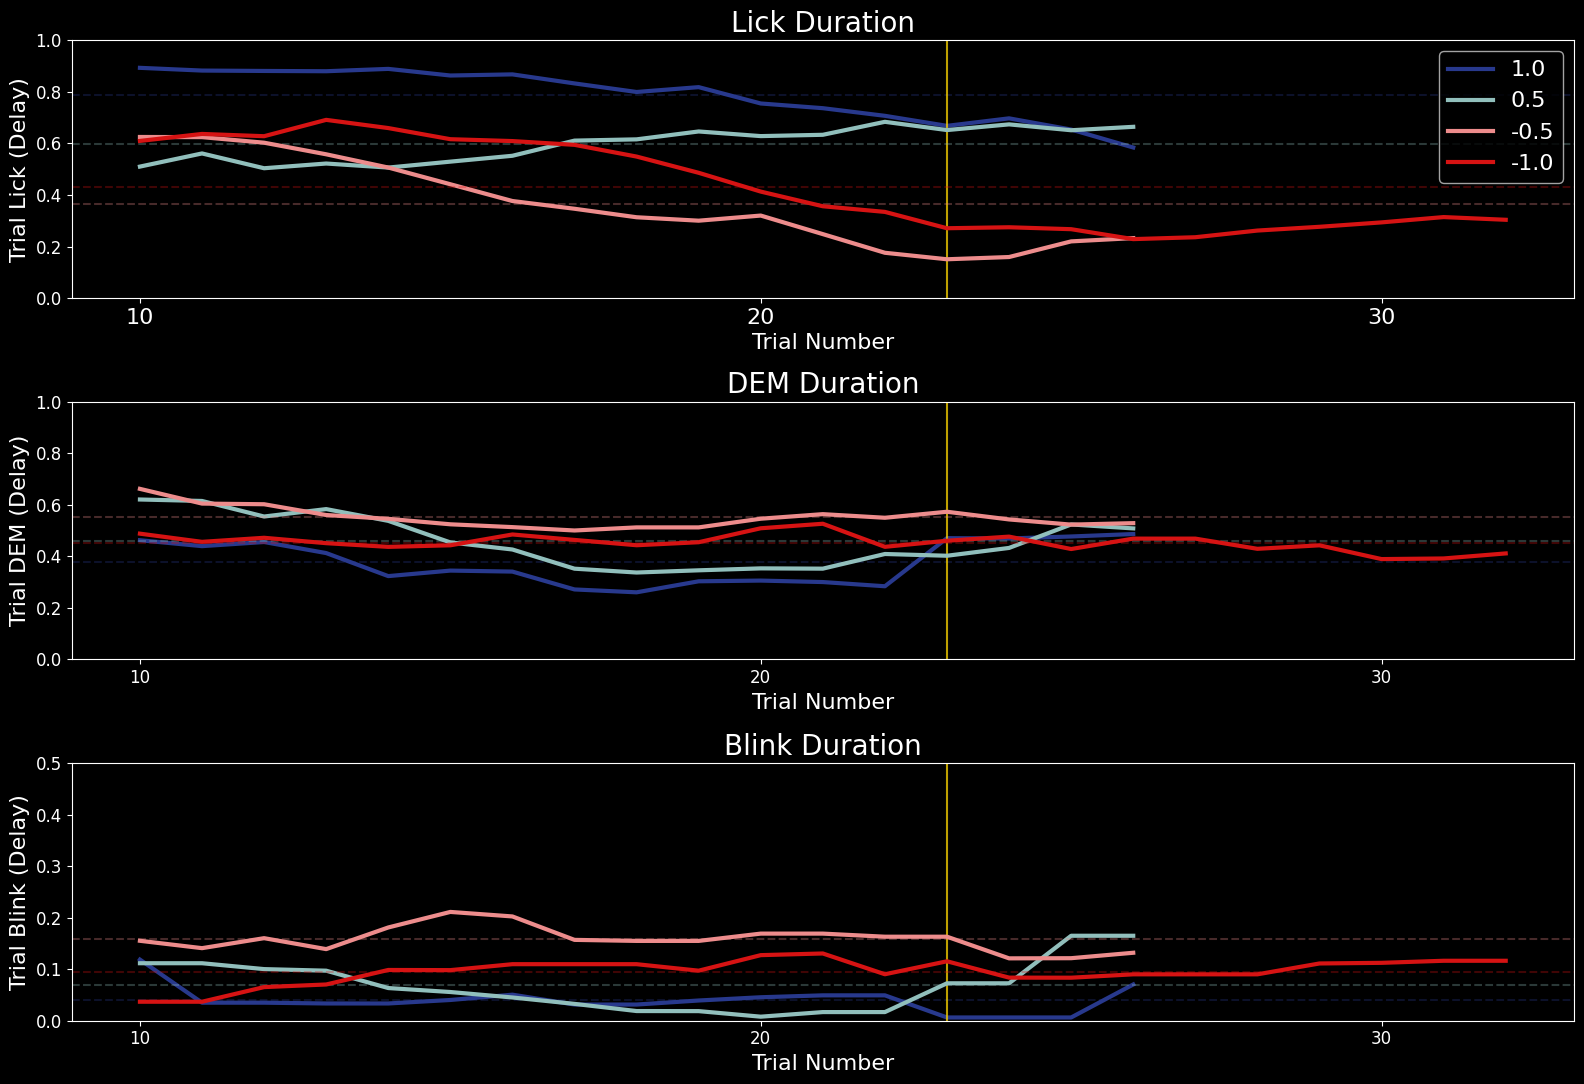

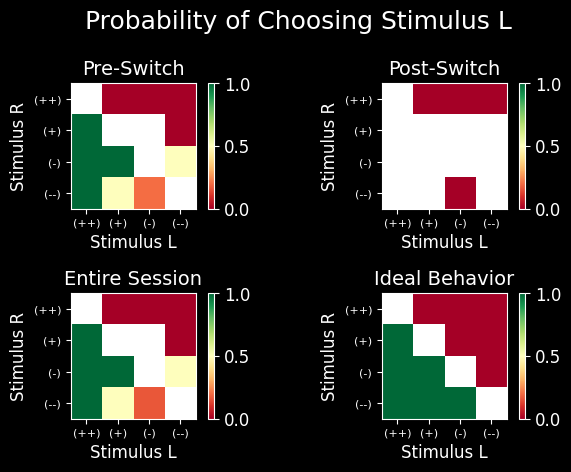

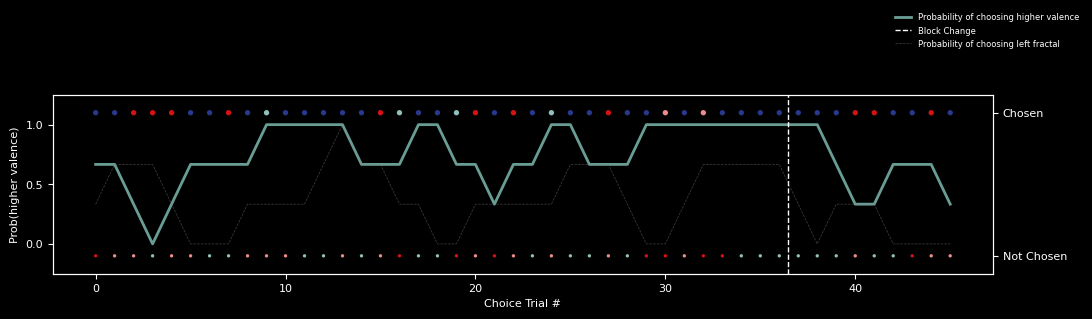

Reward vs. Airpuff Accuracy: 0.40 (+/- 0.27)
  lick_duration: 0.557
  blink_duration_offscreen: 0.232
  pupil_raster_window_avg: 0.27
  blink_duration_window: 0.555
  eye_distance: -0.0


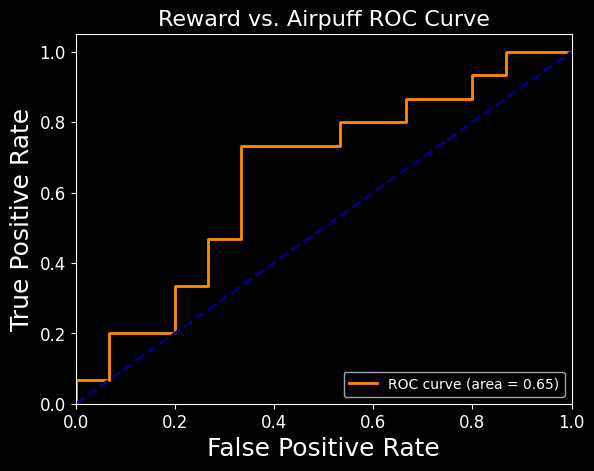

Large Reward vs. Small Reward Accuracy: 0.87 (+/- 0.33)
  lick_duration: -0.261
  blink_duration_offscreen: 0.06
  pupil_raster_window_avg: -0.025
  blink_duration_window: -0.03
  eye_distance: -0.062


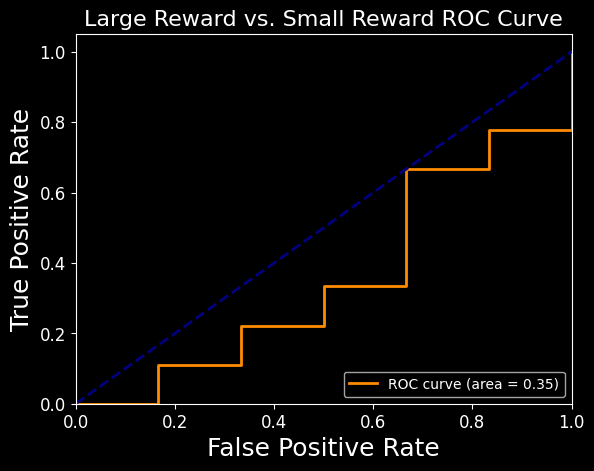

Large Airpuff vs. Small Airpuff Accuracy: 0.60 (+/- 0.27)
  lick_duration: 0.486
  blink_duration_offscreen: -0.307
  pupil_raster_window_avg: 0.055
  blink_duration_window: 0.044
  eye_distance: -0.0


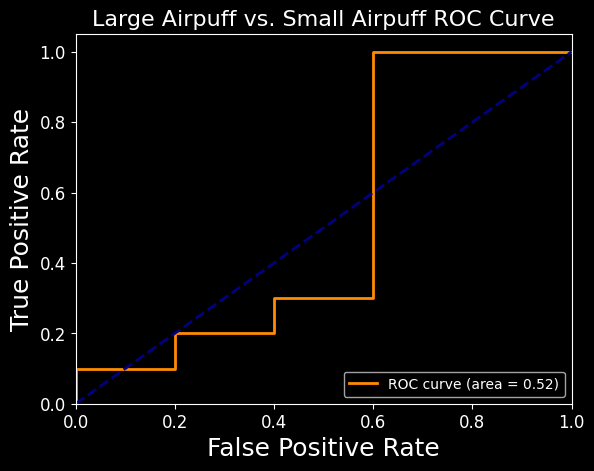


Generating session summary: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/markdowns
  Writing 20240411_aragorn.md
Writing to excel...


In [48]:
plt.style.use('dark_background')
from analyses.run_functions import run_functions

# dates = [date for date in dates if date not in ['230607', '230609']]
# dates = session_df['date'].unique()
# for date in dates:
# 	print(date)
# 	session_df_date = session_df[session_df['date'] == date]
# 	session_obj = run_functions(session_df_date, session_obj, path_obj, 
# 															behavioral_code_dict, error_dict)

# new dataframe not including valence = 0 or 0.25
session_df_pos_neg = session_df.loc[session_df['valence'].isin([-1, -0.5, 0.5, 1]) &
																		session_df['valence_1'].isin([-1, -0.5, 0.5, 1])]
session_obj = run_functions(session_df_pos_neg, session_obj, path_obj, behavioral_code_dict, error_dict)

In [49]:
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
session_df_reinforcement.loc[(session_df_reinforcement['fractal_chosen_novel'] == '_fractal_novel')].head(10)

KeyError: 'fractal_chosen_novel'

### Look at lick rate by block for novel fractals

Analyzing Lick Difference Between Blocks
  Block 1: ~3.12 drops/trial
    Valence -1.0: ~0.0  drops/trial (n=32)
    Valence -0.5: ~0.0  drops/trial (n=26)
    Valence 0.0 : ~0.0  drops/trial (n=6)
    Valence 0.5 : ~5.0  drops/trial (n=26)
    Valence 1.0 : ~10.0 drops/trial (n=22)
  Block 2: ~4.85 drops/trial
    Valence -1.0: ~0.0  drops/trial (n=4)
    Valence -0.5: ~0.0  drops/trial (n=7)
    Valence 0.0 : ~0.0  drops/trial (n=3)
    Valence 0.5 : ~5.0  drops/trial (n=6)
    Valence 1.0 : ~10.0 drops/trial (n=13)


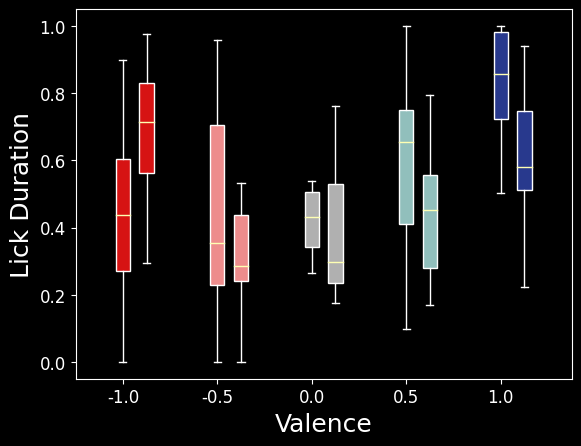

In [50]:
# see the average number of rewarded reinforcement trials in block 1 vs block 2
print(f'Analyzing Lick Difference Between Blocks')
f, ax = plt.subplots(1,1, sharey=True)
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
for block in session_df_reinforcement['block'].unique():
	session_df_block = session_df_reinforcement[session_df_reinforcement['block'] == block]
	# skip if <10 trials in the block
	if len(session_df_block) < 10:
		continue
	avg_reward_drops_block = session_df_block['reward_drops_1'].mean()
	print(f'  Block {block}: ~{round(avg_reward_drops_block, 2)} drops/trial')
	unique_valences = sorted(session_df_reinforcement['valence'].unique())
	for vix, valence in enumerate(unique_valences):
		avg_reward_drops_block_valence = session_df_block[session_df_block['valence'] == valence]['reward_drops_1']
		avg_reward_drops_block_valence_mean = avg_reward_drops_block_valence.mean()
		print(f'    Valence {valence:<4}: ~{round(avg_reward_drops_block_valence_mean, 2):<4} drops/trial (n={len(avg_reward_drops_block_valence)})')
		session_df_block_fractal = session_df_block[session_df_block['valence'] == valence]
		lick_rate_fractal = session_df_block_fractal['lick_duration'].tolist()
		# double box plot of lick rate without outliers where each block value is next to each other
		color = session_obj.valence_colors[valence]
		# set color to color
		pos_shift = [0 if block == 1 else 0.25][0]
		ax.boxplot(lick_rate_fractal, positions=[vix + pos_shift], patch_artist=True, boxprops=dict(facecolor=color), showfliers=False)
	# set x tick labels for the middle of the double box plot
	ax.set_xticks(range(len(unique_valences)))
	ax.set_xticklabels(unique_valences)
	ax.set_xlabel('Valence')
	ax.set_ylabel('Lick Duration')

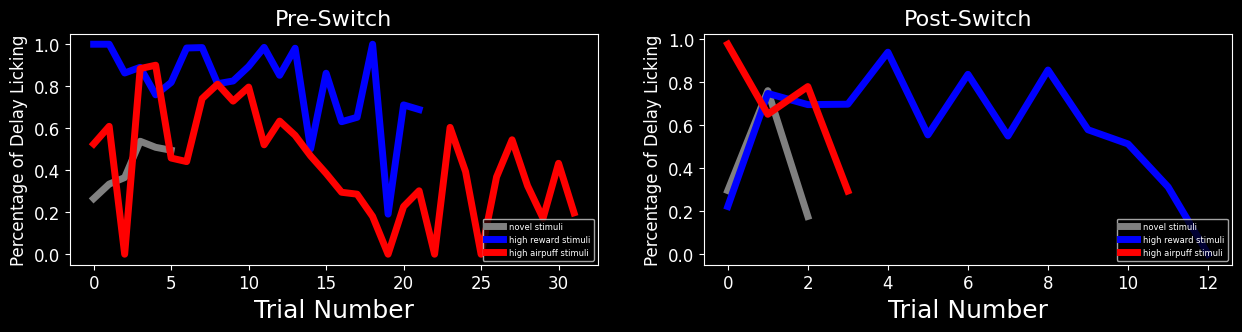

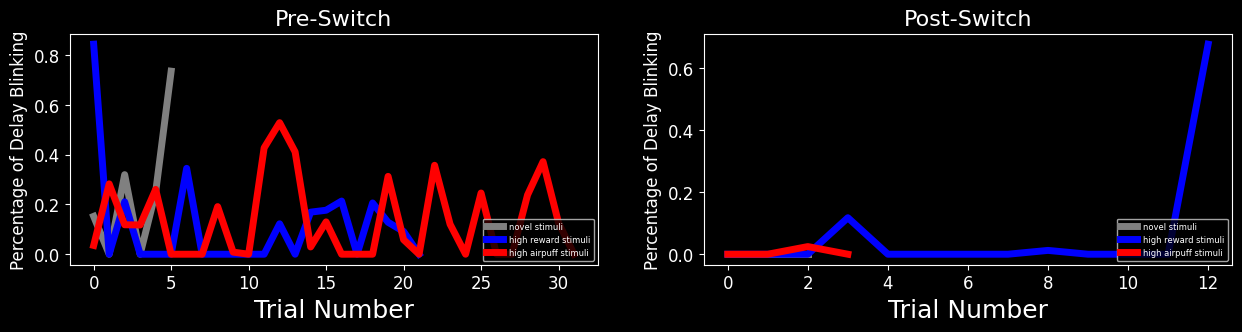

In [179]:
def novel_fractal_summary(session_df):
	session_df_correct = session_df[session_df['correct'] == 1]
	session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
	
	f, axarr = plt.subplots(1, 2, figsize=(15, 3))
	for i in [1,2]:
		session_high_reward = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 1) & (session_df_reinforcement['block'] == i)]
		session_high_airpuff = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == -1) & (session_df_reinforcement['block'] == i)]
		session_novel = session_df_reinforcement.loc[(session_df_reinforcement['fractal_chosen_novel'] == '_fractal_novel') & (session_df_reinforcement['block'] == i)]
		session_high_reward_lick = session_high_reward['lick_duration']
		session_high_airpuff_lick = session_high_airpuff['lick_duration']
		session_novel_lick = session_novel['lick_duration']
		axarr[i-1].plot(range(len(session_novel_lick)), session_novel_lick, label='novel stimuli', color='grey', lw=5)
		axarr[i-1].plot(range(len(session_high_reward_lick)), session_high_reward_lick, label='high reward stimuli', color='blue', lw=5)
		axarr[i-1].plot(range(len(session_high_airpuff_lick)), session_high_airpuff_lick, label='high airpuff stimuli', color='red', lw=5)
		session_neutral = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 0) &
																									 (session_df_reinforcement['fractal_chosen_novel'] != '_fractal_novel') & 
																									 (session_df_reinforcement['block'] == i)]
		if len(session_neutral) > 0:
			session_neutral_lick = session_neutral['lick_duration']
			axarr[i-1].plot(range(len(session_neutral_lick)), session_neutral_lick, label='neutral stimuli', color='yellow', lw=5)
		# # select row with index block_change
		axarr[i-1].set_xlabel('Trial Number')
		axarr[i-1].set_ylabel('Percentage of Delay Licking', fontsize=12)
		if i == 1:
			axarr[i-1].set_title('Pre-Switch')
		else:
			axarr[i-1].set_title('Post-Switch')
		axarr[i-1].legend(loc='lower right', fontsize=6)
	plt.show()

	f, axarr = plt.subplots(1, 2, figsize=(15, 3))
	for i in [1,2]:
		session_high_reward = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 1) & (session_df_reinforcement['block'] == i)]
		session_high_airpuff = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == -1) & (session_df_reinforcement['block'] == i)]
		session_novel = session_df_reinforcement.loc[(session_df_reinforcement['fractal_chosen_novel'] == '_fractal_novel') & (session_df_reinforcement['block'] == i)]
		session_novel_blink = session_novel['blink_duration_window']
		session_high_reward_blink = session_high_reward['blink_duration_window']
		session_high_airpuff_blink = session_high_airpuff['blink_duration_window']
		axarr[i-1].plot(range(len(session_novel_blink)), session_novel_blink, label='novel stimuli', color='grey', lw=5)
		axarr[i-1].plot(range(len(session_high_reward_blink)), session_high_reward_blink, label='high reward stimuli', color='blue', lw=5)
		axarr[i-1].plot(range(len(session_high_airpuff_blink)), session_high_airpuff_blink, label='high airpuff stimuli', color='red', lw=5)
		session_neutral = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 0) &
																									 (session_df_reinforcement['fractal_chosen_novel'] != '_fractal_novel') & 
																									 (session_df_reinforcement['block'] == i)]
		if len(session_neutral) > 0:
			session_neutral_blink = session_neutral['blink_duration_window']
			axarr[i-1].plot(range(len(session_neutral_blink)), session_neutral_blink, label='neutral stimuli', color='yellow', lw=5)
		# # select row with index block_change
		axarr[i-1].set_xlabel('Trial Number')
		axarr[i-1].set_ylabel('Percentage of Delay Blinking', fontsize=12)
		axarr[i-1].legend(loc='lower right', fontsize=6)
		if i == 1:
			axarr[i-1].set_title('Pre-Switch')
		else:
			axarr[i-1].set_title('Post-Switch')
	plt.show()

novel_fractal_summary(session_df_correct)

***
## Valence Trial Analyses
### Higher Valence and Reaction Time Performance on Choice Trials

In [52]:
from analyses import print_performance
print_performance.print_performance(session_df)
print('\n')
print_performance.reaction_time_choice(session_df)

Session Performance
 Percent successful reinforcement trials: 0.78 (145/186)
   Valence 1.0: 0.686 (35/51)
   Valence 0.5: 0.8 (32/40)
   Valence 0.0: 1.0 (9/9)
   Valence -0.5: 0.786 (33/42)
   Valence -1.0: 0.818 (36/44)
 Percent successful choice trials: 0.836 (46/55)
   Valence Pair [-1.0, 1.0]: 1.0 (5/5)
   Valence Pair [-1.0, 0.5]: 1.0 (5/5)
   Valence Pair [-0.5, 0.5]: 1.0 (2/2)
   Valence Pair [-1.0, -0.5]: 0.909 (10/11)
   Valence Pair [0.5, 1.0]: 0.773 (17/22)
   Valence Pair [-0.5, 1.0]: 0.7 (7/10)
 Percent left choice trials: 0.37 (17/46)
 Percent higher valence choice trials: 0.761 (35/46)
   Valence Pair [-1.0, 1.0]: 1.0 (5/5)
   Valence Pair [-0.5, 1.0]: 1.0 (7/7)
   Valence Pair [0.5, 1.0]: 1.0 (17/17)
   Valence Pair [-0.5, 0.5]: 1.0 (2/2)
   Valence Pair [-1.0, 0.5]: 0.4 (2/5)
   Valence Pair [-1.0, -0.5]: 0.2 (2/10)


Reaction Time on Choice Trials
 Valence: -1.0
   Reaction Time: 152.909
   Valence Not Chosen: -0.5 137.0 (8)
   Valence Not Chosen: 0.5 195.333 (3)
 V

In [53]:
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
session_df_reinforcement.groupby(['block', 'valence'])\
							[['lick_duration',
								'blink_duration_offscreen',
								'pupil_raster_window_avg',
								'blink_duration_window',
								'eye_distance']].mean()

lick_duration  blink_duration_offscreen  \
block valence                                            
1     -1.0          0.431063                  0.445409   
      -0.5          0.431346                  0.570947   
       0.0          0.417667                  0.439744   
       0.5          0.591500                  0.498195   
       1.0          0.812864                  0.379895   
2     -1.0          0.675500                  0.627692   
      -0.5          0.310571                  0.617912   
       0.0          0.411000                  0.262051   
       0.5          0.447333                  0.360513   
       1.0          0.577538                  0.466036   

               pupil_raster_window_avg  blink_duration_window  eye_distance  
block valence                                                                
1     -1.0                    0.088630               0.136755    985.213025  
      -0.5                    0.145562               0.219734   1745.995917  
       0.0                    0.155000               0.243077   1374.885753  
       0.5                    0.109320               0.157544    734.190701  
       1.0                    0.076259               0.114056    634.286364  
2     -1.0                    0.001538               0.006154    403.487688  
      -0.5                    0.090659               0.157802   2300.336768  
       0.0                    0.000000               0.000000     44.510357  
       0.5                    0.066923               0.092436    646.693374  
       1.0                    0.054083               0.062071    236.937889

In [54]:
pd.set_option('display.max_rows', None)
session_df_choice = session_df_correct[session_df_correct['choice_trial'] == 1]
correct_choice_trials = [1 if session_df_choice['valence'].iloc[i] == np.max([session_df_choice['valence_1'].iloc[i], session_df_choice['valence_2'].iloc[i]], axis=0) else 0 for i in range(len(session_df_choice))]
session_df_choice['correct_choice'] = correct_choice_trials
session_df_choice[['block', 'valence_1', 'valence_2', 'valence', 'correct_choice']]

block  valence_1  valence_2  valence  correct_choice
3        1        1.0       -1.0      1.0               1
7        1       -0.5        1.0      1.0               1
10       1       -1.0       -0.5     -1.0               0
25       1       -1.0        0.5     -1.0               0
34       1       -0.5       -1.0     -1.0               0
47       1       -0.5        1.0      1.0               1
50       1        0.5        1.0      1.0               1
52       1        0.5       -1.0     -1.0               0
58       1       -0.5        1.0      1.0               1
65       1        0.5       -0.5      0.5               1
71       1       -0.5        1.0      1.0               1
87       1        0.5        1.0      1.0               1
90       1        1.0        0.5      1.0               1
132      1        1.0       -0.5      1.0               1
134      1        1.0        0.5      1.0               1
144      1       -0.5       -1.0     -1.0               0
151      1        0.5       -1.0      0.5               1
159      1        0.5        1.0      1.0               1
171      1        0.5        1.0      1.0               1
172      1       -1.0        0.5      0.5               1
173      1       -0.5       -1.0     -1.0               0
179      1        1.0       -1.0      1.0               1
191      1       -0.5       -1.0     -1.0               0
195      1        0.5        1.0      1.0               1
196      1        0.5       -0.5      0.5               1
199      1        0.5        1.0      1.0               1
222      1        1.0        0.5      1.0               1
231      1       -1.0       -0.5     -1.0               0
232      1        0.5        1.0      1.0               1
233      1       -1.0        1.0      1.0               1
238      1       -1.0       -0.5     -0.5               1
241      1       -0.5        1.0      1.0               1
246      1       -0.5       -1.0     -0.5               1
254      1        1.0       -1.0      1.0               1
291      1        0.5        1.0      1.0               1
293      1        1.0        0.5      1.0               1
300      1        1.0        0.5      1.0               1
302      1        0.5        1.0      1.0               1
328      2        0.5        1.0      1.0               1
353      2        0.5        1.0      1.0               1
370      2       -1.0       -0.5     -1.0               0
402      2        0.5       -1.0     -1.0               0
417      2        0.5        1.0      1.0               1
423      2       -1.0        1.0      1.0               1
435      2       -0.5       -1.0     -1.0               0
436      2       -0.5        1.0      1.0               1

In [14]:
session_df_reinforcement.groupby(['condition', 'fractal_chosen_novel'])\
							[['valence', 'fractal_count_in_block', 'lick_duration',
								'blink_duration_offscreen',
								'pupil_raster_window_avg',
								'blink_duration_window',
								'eye_distance']].mean()

valence  fractal_count_in_block  \
condition fractal_chosen_novel                                    
1         _fractal_A               1.00               19.209302   
          _fractal_B               0.50               13.804878   
          _fractal_C              -0.50                6.933333   
          _fractal_D              -1.00                3.636364   
          _fractal_novel           0.00                1.000000   
2         _fractal_A               0.50                7.166667   
          _fractal_B               0.25                8.941176   
          _fractal_C              -0.50                9.933333   
          _fractal_D              -1.00               12.351351   
          _fractal_novel           0.00                1.000000   

                                lick_duration  blink_duration_offscreen  \
condition fractal_chosen_novel                                            
1         _fractal_A                 0.695116                  0.446655   
          _fractal_B                 0.607561                  0.517261   
          _fractal_C                 0.387933                  0.625590   
          _fractal_D                 0.502455                  0.592308   
          _fractal_novel             0.484394                  0.554172   
2         _fractal_A                 0.662056                  0.429615   
          _fractal_B                 0.617471                  0.333258   
          _fractal_C                 0.275933                  0.560026   
          _fractal_D                 0.478622                  0.383971   
          _fractal_novel             0.455423                  0.521302   

                                pupil_raster_window_avg  \
condition fractal_chosen_novel                            
1         _fractal_A                           0.031860   
          _fractal_B                           0.068705   
          _fractal_C                           0.220974   
          _fractal_D                           0.174825   
          _fractal_novel                       0.139883   
2         _fractal_A                           0.110940   
          _fractal_B                           0.000090   
          _fractal_C                           0.120333   
          _fractal_D                           0.064075   
          _fractal_novel                       0.022988   

                                blink_duration_window  eye_distance  
condition fractal_chosen_novel                                       
1         _fractal_A                         0.070698    134.166999  
          _fractal_B                         0.123283     95.122622  
          _fractal_C                         0.309231     75.980449  
          _fractal_D                         0.250070    114.118566  
          _fractal_novel                     0.189184     72.888070  
2         _fractal_A                         0.162778     76.906832  
          _fractal_B                         0.000498     49.505839  
          _fractal_C                         0.138769     61.822136  
          _fractal_D                         0.104324     69.574764  
          _fractal_novel                     0.048521     62.966864

### Behavioral Summary Panels by Valence

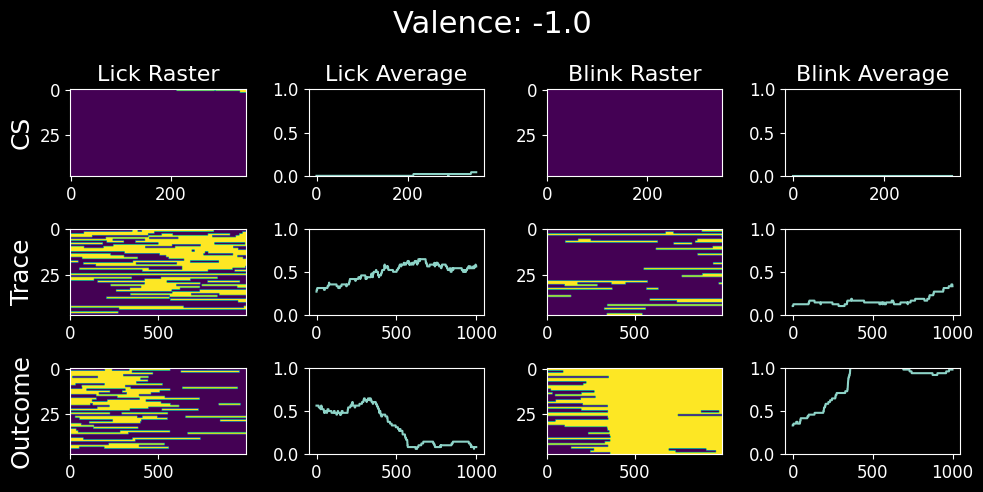

Valence: -1.0
  Lick CS: 0.009
  Lick Trace: 0.493
  Lick Outcome: 0.323


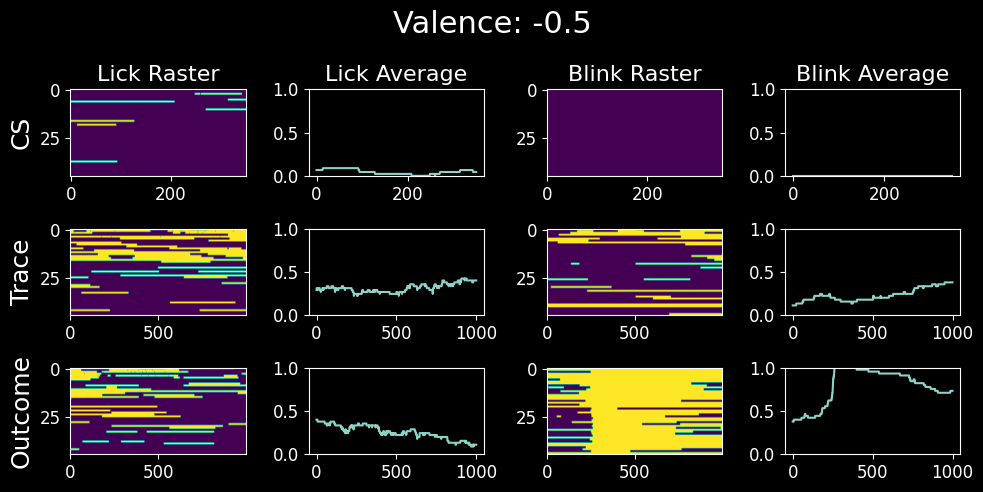

Valence: -0.5
  Lick CS: 0.046
  Lick Trace: 0.315
  Lick Outcome: 0.257


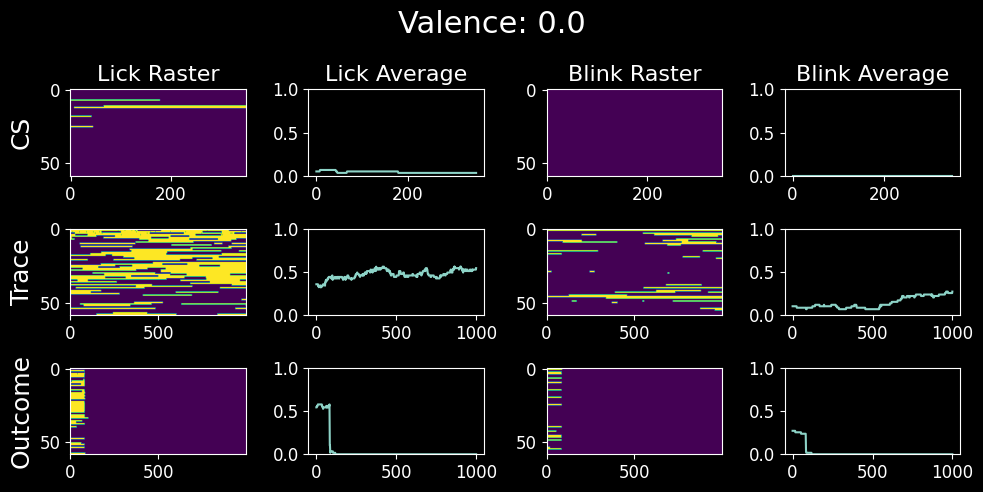

Valence: 0.0
  Lick CS: 0.043
  Lick Trace: 0.472
  Lick Outcome: 0.048


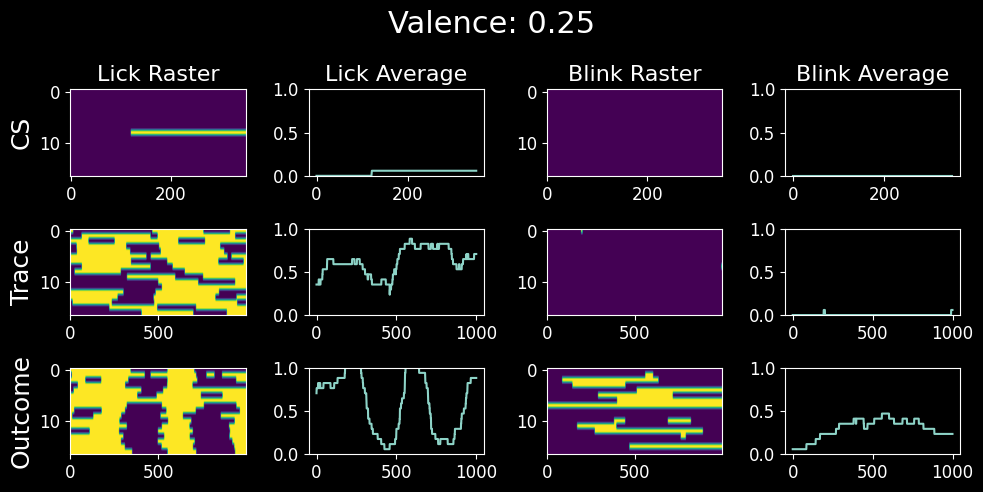

Valence: 0.25
  Lick CS: 0.038
  Lick Trace: 0.62
  Lick Outcome: 0.591


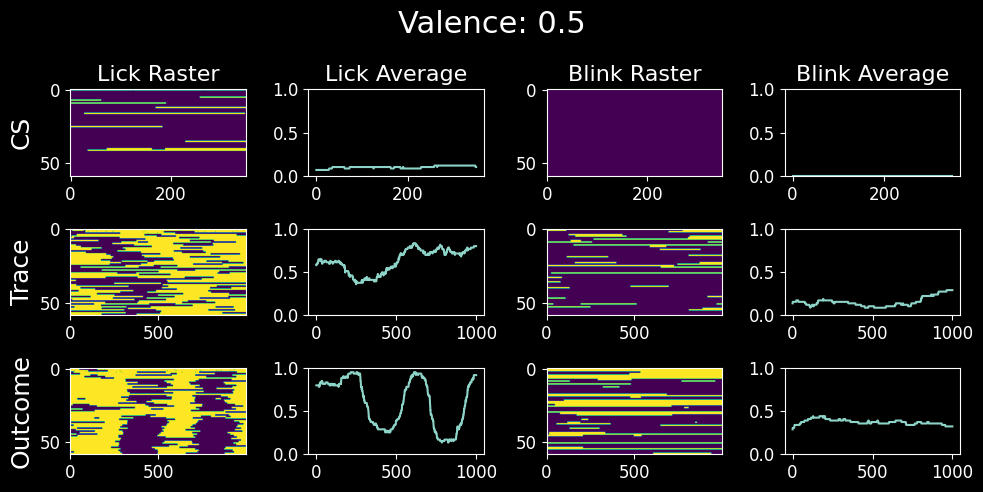

Valence: 0.5
  Lick CS: 0.1
  Lick Trace: 0.626
  Lick Outcome: 0.597


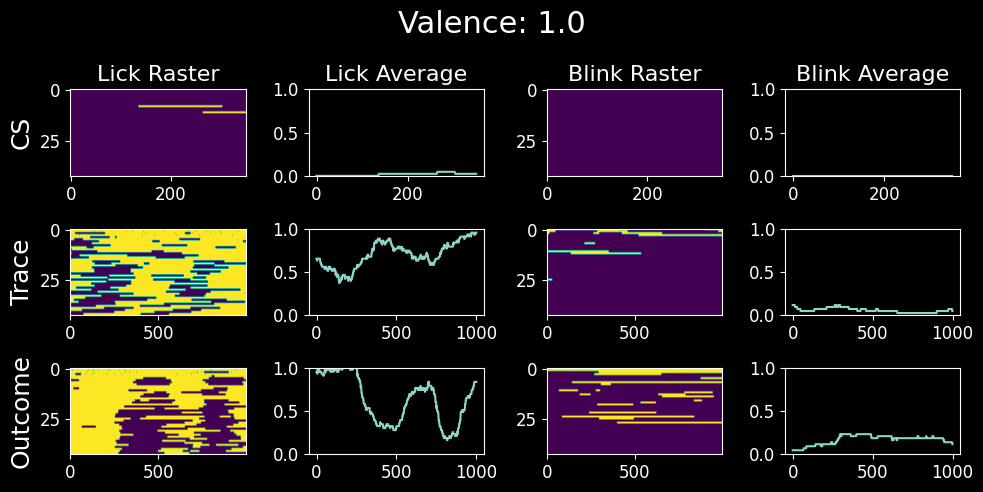

Valence: 1.0
  Lick CS: 0.017
  Lick Trace: 0.697
  Lick Outcome: 0.631


In [15]:
from analyses.beh_summary_panels import valence_panels
valence_panels(session_df_correct)

In [57]:
session_df_correct[['trial_num', 'block', 'valence', 'fractal_chosen', 
										'fractal_not_chosen', 'lick_duration', 'blink_duration_offscreen', 
										'eye_distance']]

trial_num  block  valence fractal_chosen fractal_not_chosen  \
1            2      1      1.0     _fractal_A         _fractal_A   
3            4      1      1.0     _fractal_A         _fractal_D   
5            6      1     -0.5     _fractal_C         _fractal_C   
7            8      1      1.0     _fractal_A         _fractal_C   
9           10      1     -1.0     _fractal_D         _fractal_D   
10          11      1     -1.0     _fractal_D         _fractal_C   
11          12      1      0.0     _fractal_1         _fractal_1   
12          13      1     -0.5     _fractal_C         _fractal_C   
13          14      1      0.5     _fractal_B         _fractal_B   
16          17      1     -0.5     _fractal_C         _fractal_C   
19          20      1     -0.5     _fractal_C         _fractal_C   
21          22      1      1.0     _fractal_A         _fractal_A   
24          25      1      0.5     _fractal_B         _fractal_B   
25          26      1     -1.0     _fractal_D         _fractal_B   
26          27      1      1.0     _fractal_A         _fractal_A   
27          28      1      0.5     _fractal_B         _fractal_B   
28          29      1     -1.0     _fractal_D         _fractal_D   
29          30      1     -1.0     _fractal_D         _fractal_D   
34          35      1     -1.0     _fractal_D         _fractal_C   
37          38      1      0.5     _fractal_B         _fractal_B   
39          40      1     -1.0     _fractal_D         _fractal_D   
41          42      1     -1.0     _fractal_D         _fractal_D   
42          43      1      1.0     _fractal_A         _fractal_A   
43          44      1      1.0     _fractal_A         _fractal_A   
44          45      1      0.5     _fractal_B         _fractal_B   
47          48      1      1.0     _fractal_A         _fractal_C   
48          49      1      0.5     _fractal_B         _fractal_B   
50          51      1      1.0     _fractal_A         _fractal_B   
52          53      1     -1.0     _fractal_D         _fractal_B   
53          54      1     -1.0     _fractal_D         _fractal_D   
58          59      1      1.0     _fractal_A         _fractal_C   
64          65      1      1.0     _fractal_A         _fractal_A   
65          66      1      0.5     _fractal_B         _fractal_C   
67          68      1     -1.0     _fractal_D         _fractal_D   
69          70      1      0.5     _fractal_B         _fractal_B   
70          71      1     -1.0     _fractal_D         _fractal_D   
71          72      1      1.0     _fractal_A         _fractal_C   
72          73      1      0.5     _fractal_B         _fractal_B   
78          79      1      1.0     _fractal_A         _fractal_A   
81          82      1     -0.5     _fractal_C         _fractal_C   
83          84      1     -1.0     _fractal_D         _fractal_D   
85          86      1     -0.5     _fractal_C         _fractal_C   
87          88      1      1.0     _fractal_A         _fractal_B   
88          89      1      0.5     _fractal_B         _fractal_B   
90          91      1      1.0     _fractal_A         _fractal_B   
93          94      1      0.0     _fractal_3         _fractal_3   
94          95      1      1.0     _fractal_A         _fractal_A   
98          99      1     -0.5     _fractal_C         _fractal_C   
104        105      1     -0.5     _fractal_C         _fractal_C   
108        109      1      0.5     _fractal_B         _fractal_B   
109        110      1     -1.0     _fractal_D         _fractal_D   
111        112      1     -1.0     _fractal_D         _fractal_D   
112        113      1      0.5     _fractal_B         _fractal_B   
115        116      1      1.0     _fractal_A         _fractal_A   
116        117      1     -1.0     _fractal_D         _fractal_D   
117        118      1     -0.5     _fractal_C         _fractal_C   
119        120      1      0.5     _fractal_B         _fractal_B   
125        126      1      0.5     _fractal_B         _fracta

***
## Exploratory Analysis
### High Lick + Low DEM/Blink Trials

In [58]:
session_df_correct.loc[(session_df_correct['eye_distance'] < 50) &
											 (session_df_correct['lick_duration'] > 0.8)]\
		[['date', 'trial_num', 'block', 'valence', 'fractal_chosen', 'fractal_not_chosen', 
		'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  block  valence fractal_chosen fractal_not_chosen  \
19   240411         20      1     -0.5     _fractal_C         _fractal_C   
183  240411        184      1      1.0     _fractal_A         _fractal_A   

     lick_duration  blink_duration_offscreen  eye_distance  
19           0.874                  0.967692     38.346690  
183          0.981                  0.000000     32.389853

### High DEM + Blink + Eye Movement / Low Lick Trials

In [11]:
session_df_correct.loc[(session_df_correct['blink_duration_offscreen'] > 0.9) &
											 (session_df_correct['eye_distance'] > 100) & 
											 (session_df_correct['lick_duration'] < 0.1)]\
		[['date', 'trial_num', 'block', 'valence', 'fractal_chosen', 'fractal_not_chosen', 
		'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  block  valence fractal_chosen fractal_not_chosen  \
29   240411         30      1     -1.0     _fractal_D         _fractal_D   
186  240411        187      1     -1.0     _fractal_D         _fractal_D   
191  240411        192      1     -1.0     _fractal_D         _fractal_C   
225  240411        226      1     -1.0     _fractal_D         _fractal_D   
451  240411        452      2     -0.5     _fractal_A         _fractal_A   
464  240411        465      2      1.0     _fractal_C         _fractal_C   

     lick_duration  blink_duration_offscreen  eye_distance  
29             0.0                  0.938462   1859.458543  
186            0.0                  0.911538    380.436954  
191            0.0                  0.912308   2538.965182  
225            0.0                  0.965385    974.195660  
451            0.0                  1.000000  11032.187322  
464            0.0                  0.933846    969.532184

In [60]:
# get correlation between two columns 'pupil_raster_window_avg' and 'blink_duration'
print('Lick vs. DEM Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_offscreen']), 3))
print('Lick vs. Blink Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_window']), 3))
print('DEM vs. Blink Correlation', round(session_df_correct['blink_duration_offscreen'].corr(session_df_correct['blink_duration_window']), 3))
print('Pupil 0 vs. Blink Correlation', round(session_df_correct['pupil_raster_window_avg'].corr(session_df_correct['blink_duration_window']), 3))

Lick vs. DEM Correlation 0.015
Lick vs. Blink Correlation -0.066
DEM vs. Blink Correlation 0.484
Pupil 0 vs. Blink Correlation 0.948


***
## Single Trial Analysis

In [153]:
trial_selected = 13
session_df_selected = session_df[session_df['trial_num'] == trial_selected]
session_df_selected[['correct',
										 'valence',
										 'fractal_chosen',
										 'fractal_not_chosen',
										 'lick_duration',
										 'blink_duration_sig',
										 'blink_duration_offscreen',
										 'pupil_raster_window_avg',
										 'blink_duration_window',
										 'eye_distance',
										 'eye_distance',
										 'Outcome Start',
										 'Reward Trigger',
										 'Airpuff Trigger'
										]]

correct  valence fractal_chosen fractal_not_chosen  lick_duration  \
12        1     -0.5     _fractal_C         _fractal_C           0.94   

    blink_duration_sig  blink_duration_offscreen  pupil_raster_window_avg  \
12                 0.0                  0.331538                      0.0   

    blink_duration_window  eye_distance  eye_distance Outcome Start  \
12                    0.0     72.286058     72.286058         24382   

   Reward Trigger Airpuff Trigger  
12           <NA>           24390

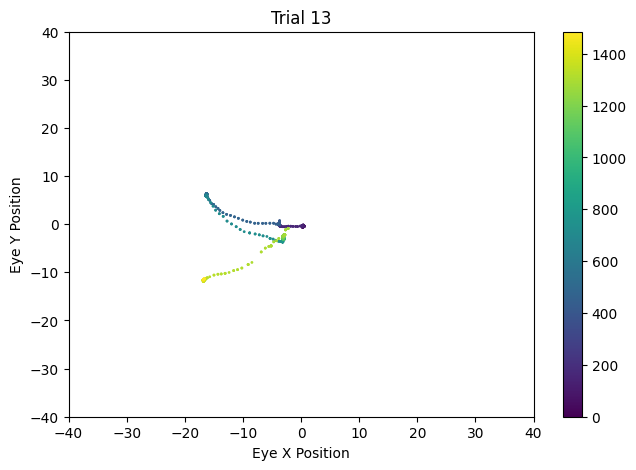

In [154]:
def plot_eye_single_trial(session_df, trial_num, epoch_start, epoch_end):
	# 3 figures, where the left one is twice as tall as the other two
	f, axarr = plt.subplots(1, 1, figsize=(7.5, 5))
	trial = session_df[session_df['trial_num'] == trial_num]
	epoch_start_time = trial[epoch_start].iloc[0]
	epoch_end_time = trial[epoch_end].iloc[0]
	trial_eye_x = trial['eye_x'].tolist()[0][epoch_start_time:epoch_end_time]
	trial_eye_y = trial['eye_y'].tolist()[0][epoch_start_time:epoch_end_time]
	# trial_eye_x = trial['eye_x'].iloc[0]
	# trial_eye_y = trial['eye_y'].iloc[0]
	# show heat map
	plt.scatter(trial_eye_x, trial_eye_y, c=np.arange(len(trial_eye_x)), cmap='viridis', s=1)
	plt.colorbar()
	plt.xlim(-40, 40)
	plt.ylim(-40, 40)
	plt.title(f'Trial {trial_num}')
	plt.xlabel('Eye X Position')
	plt.ylabel('Eye Y Position')
	plt.show()

plot_eye_single_trial(session_df, trial_selected, epoch_start='Trace Start', epoch_end='Trace End')

Total Eye Positions: 1500
Histogram Positions: 1500
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.11   0.     0.     0.     0.    ]
 [0.     0.     0.     0.496  0.1067 0.     0.     0.    ]
 [0.     0.     0.114  0.0067 0.1667 0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 28.73%
outside x,y [-40, 40]: 0.0%
  eye_heatmap_-0.5.png saved.


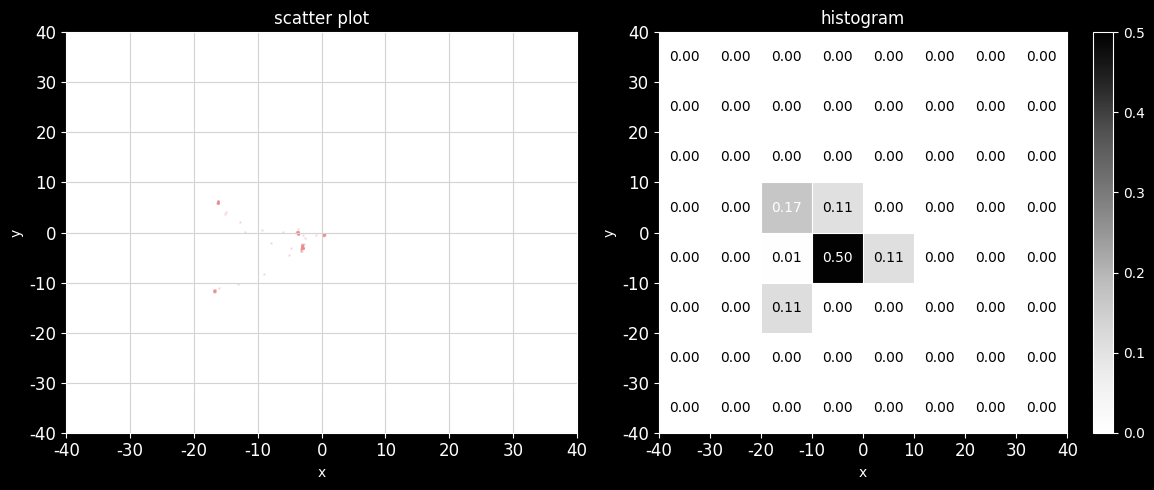

In [155]:
plt.style.use('dark_background')
from analyses.eyetracking_analysis import eyetracking_analysis
session_df_selected = session_df[session_df['trial_num'] == trial_selected]
eyetracking_analysis(session_df_selected, session_obj, TRIAL_THRESHOLD=None)

***
## SpikeGLX 

In [14]:
import re
import math
from pathlib import Path
from spike_glx import read_SGLX
from classes.SpikeGLX import SpikeGLX
from spike_glx.load_SGLX import load_sglx

# Manually assign the signal channel numbers
# from how you set them up on the NI PXIe-6341 board
signal_dict = {
	0: 'cam_sync',
	1: 'cam_save',
	2: 'lick',
	3: 'photodiode',
	4: 'empty'
}

# Manually assign the time epochs you care about
# which have to exist as rows in session_df
epochs = ['Start Trial', 'Fixation On', 'CS On',	
					'Trace Start', 'Outcome Start', 'End Trial']
spikeglx_obj = load_sglx(session_df, session_obj, path_obj, signal_dict, epochs)

Created new session folder: /Users/rahimhashim/Desktop/Monkey-Emotions/_data/Aragorn_231026


AttributeError: 'SessionPath' object has no attribute 'spikeglx_dir_path'

### See the raw data to validate
Just to make sure we captured the raw data from SpikeGLX, we're going to plot the first 10 seconds of data generated

In [18]:
# Visualize SpikeGLX channels
read_SGLX.plot_channels_corrected(spikeglx_obj, tStart=0, tEnd=10)

SpikeGLX object missing attributes (meta, chan_dict, signal_dict)


In [ ]:
from video.wm_videos import parse_wm_videos

kwargs = {'spikeglx_obj': spikeglx_obj, 
					'session_obj': session_obj, 
					'trial_start': 0,
					'trial_end': len(session_obj.df),
					'epoch_start': 'Trace Start', 
					'epoch_end': 'Outcome Start', 
					'thread_flag': True}

parse_wm_videos(**kwargs)

***
## Generate MonkeyLogic Behavior Trial Videos

Found 6 marker files.
  Reading: /Users/rahimhashim/Downloads/aragorn_240411/aragorn_240411_183_e3v8360DLC_resnet50_face_1Apr15shuffle1_1030000_filtered.h5
  Reading: /Users/rahimhashim/Downloads/aragorn_240411/aragorn_240411_183_e3v83adDLC_resnet50_body_1Apr15shuffle1_1030000_filtered.h5
  Reading: /Users/rahimhashim/Downloads/aragorn_240411/aragorn_240411_183_e3v83d6DLC_resnet50_face_2Apr15shuffle1_1030000_filtered.h5
  Reading: /Users/rahimhashim/Downloads/aragorn_240411/aragorn_240411_29_e3v83adDLC_resnet50_body_1Apr15shuffle1_1030000_filtered.h5
  Reading: /Users/rahimhashim/Downloads/aragorn_240411/aragorn_240411_29_e3v83d6DLC_resnet50_face_2Apr15shuffle1_1030000_filtered.h5
  Reading: /Users/rahimhashim/Downloads/aragorn_240411/aragorn_240411_29_e3v8360DLC_resnet50_face_1Apr15shuffle1_1030000_filtered.h5
Done.
Processing aragorn - 240411 - 183 - e3v8360
  Number of bodyparts: 55
  Overall likelihood: 0.73
Processing aragorn - 240411 - 183 - e3v83ad
  Number of bodyparts: 17
  Ov

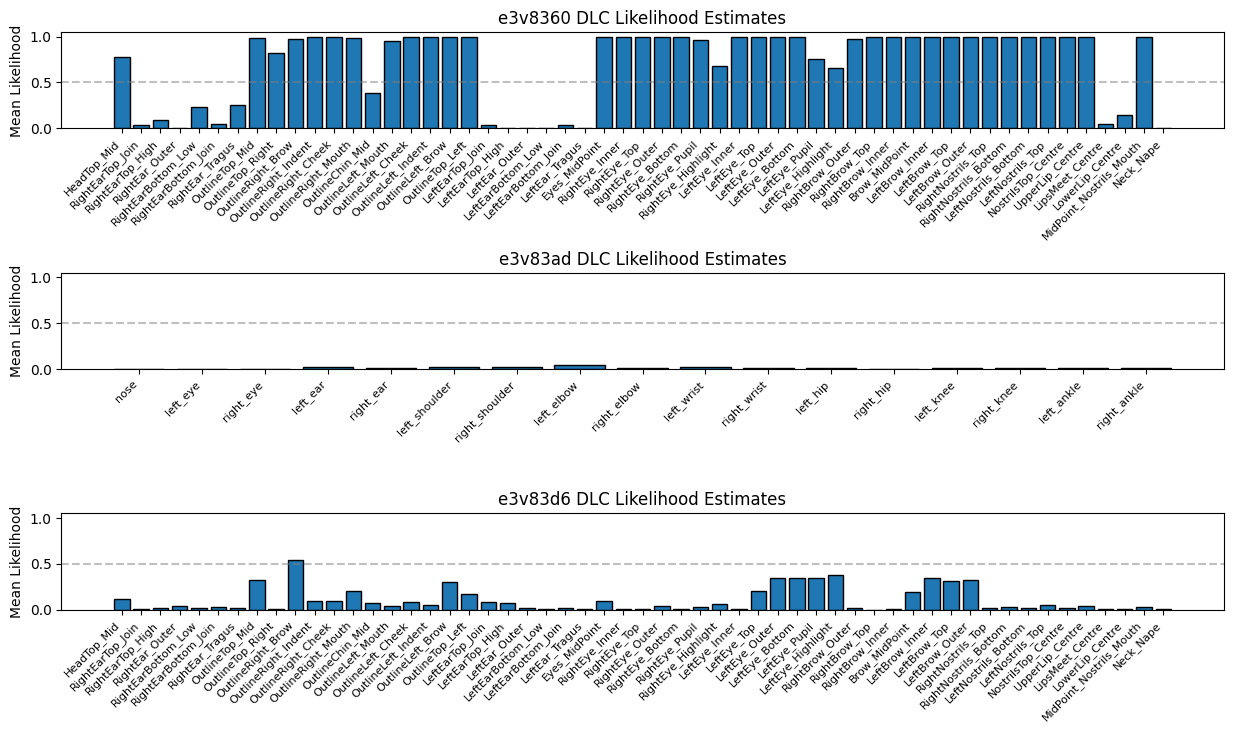

In [141]:
import warnings
import seaborn as sns
from dlc_primate.dlc_analysis import generate_marker_df, plot_bodypart_likelihoods

# turn off UserWarning: FixedFormatter should only be used together with FixedLocator
warnings.filterwarnings("ignore", category=UserWarning)
video_folder = '/Users/rahimhashim/Downloads/aragorn_240411/' 

dlc_df_dict = generate_marker_df(video_folder)
body_part_likelihoods = plot_bodypart_likelihoods(dlc_df_dict)

Adding aragorn 240411 183 e3v8360 OutlineRight_Brow - 934 poses
  Average (x,y): 272.62 177.71
Adding aragorn 240411 183 e3v8360 LeftEye_Bottom - 934 poses
  Average (x,y): 397.22 196.9
Adding aragorn 240411 183 e3v8360 LeftBrow_Inner - 934 poses
  Average (x,y): 380.84 173.36
Adding aragorn 240411 183 e3v8360 LeftEye_Outer - 934 poses
  Average (x,y): 408.2 188.73
Adding aragorn 240411 183 e3v8360 LeftBrow_Outer - 934 poses
  Average (x,y): 417.81 179.69
Adding aragorn 240411 183 e3v8360 OutlineTop_Mid - 934 poses
  Average (x,y): 364.9 145.67
Adding aragorn 240411 183 e3v8360 LeftBrow_Top - 934 poses
  Average (x,y): 398.61 172.04
Adding aragorn 240411 183 e3v8360 OutlineLeft_Brow - 934 poses
  Average (x,y): 441.13 189.31
Adding aragorn 240411 183 e3v8360 LeftEye_Top - 934 poses
  Average (x,y): 395.11 180.35
Adding aragorn 240411 183 e3v8360 Brow_MidPoint - 934 poses
  Average (x,y): 363.4 173.52
Adding aragorn 240411 183 e3v83d6 OutlineRight_Brow - 468 poses
  Average (x,y): 314.1

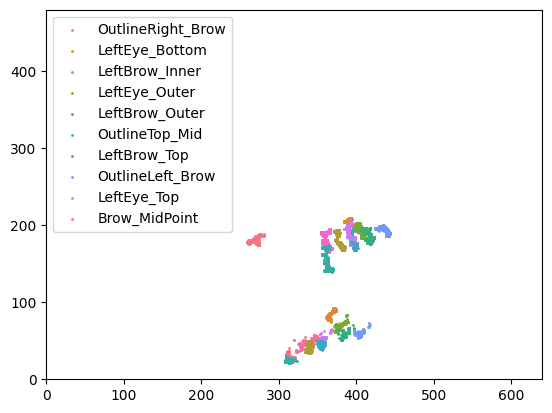

In [143]:
from collections import OrderedDict
import matplotlib.pyplot as plt

# plot all the x,y positions for top 10 body parts
selected_body_parts = list(body_part_likelihoods.keys())[:10]
# make colormap of length 'selected_body_parts'
colors = sns.color_palette('husl', len(selected_body_parts))
# make dictionary from colors
color_dict = {selected_body_parts[i]: colors[i] for i in range(len(selected_body_parts))}

f, ax = plt.subplots(1,1)

for monkey in dlc_df_dict.keys():
	for date in dlc_df_dict[monkey].keys():
		for trial in dlc_df_dict[monkey][date].keys():
			for camera in dlc_df_dict[monkey][date][trial].keys():
				scorer = dlc_df_dict[monkey][date][trial][camera].columns.get_level_values(0).unique()[0]
				body_parts = dlc_df_dict[monkey][date][trial][camera].columns.get_level_values(1).unique()
				for b_index, body_part in enumerate(selected_body_parts):
					if body_part in body_parts:
						df = dlc_df_dict[monkey][date][trial][camera][scorer][body_part]
						x = df['x'].tolist()
						y = df['y'].tolist()
						likelihood = df['likelihood'].tolist()
						# filter indice of all x, y positions where likelihood < 0.8
						indices = [i for i, l in enumerate(likelihood) if l < 0.8]
						# filter x,y positions where likelihood < 0.6
						x = [x[i] for i in range(len(x)) if i not in indices]
						if len(x) < 10:
							print(f'Skipping {monkey} {date} {trial} {camera} {body_part} - {len(x)} poses')
							continue
						x_mean = np.mean(x)
						y = [y[i] for i in range(len(y)) if i not in indices]
						y_mean = np.mean(y)
						print(f'Adding {monkey} {date} {trial} {camera} {body_part} - {len(x)} poses')
						print(f'  Average (x,y): {round(x_mean, 2)} {round(y_mean, 2)}')
						# plot x,y positions
						plt.scatter(x, y, color=color_dict[body_part], s=1, label=body_part)
						plt.xlim(0, 640)
						plt.ylim(0, 480)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

In [ ]:
epochs = [epoch for epoch in behavioral_code_dict.values()]
print('Epochs:')
[print(f'  {epochs}') for epochs in epochs]

### Canny Video Generation

In [160]:
from video.canny_detection import canny_detection

video_files = [file_name for file_name in os.listdir(video_folder) if file_name.endswith('.mp4') and 'filtered' not in file_name]
for video in video_files:
	# get trial number
	trial_index = int(video.split('_')[-2])
	print(f'Trial Index: {trial_index}')
	trial = session_df[session_df['trial_num'] == trial_index+1]
	video_path = os.path.join(video_folder, video)
	canny_detection(trial, epochs, video_path, slowdown=4)

Trial Index: 13
  Eye Positions: 7425
  Video: /Users/rahimhashim/Downloads/aragorn_240411/aragorn_240411_13_e3v831b.mp4
    Original FPS: 120.0
       Slowing Video by: 4x
    Final FPS: 30
    Width x Height: 640x480
    Num Frames (cam_frames): 891
    Num Frames (video): 700.0
    Frames: 4-7421
Trial Index: 183
  Eye Positions: 9348
  Video: /Users/rahimhashim/Downloads/aragorn_240411/aragorn_240411_183_e3v83ad.mp4
    Original FPS: 120.0
       Slowing Video by: 4x
    Final FPS: 30
    Width x Height: 640x480
    Num Frames (cam_frames): 1121
    Num Frames (video): 934.0
    Frames: 8-9341
Trial Index: 183
  Eye Positions: 9348
  Video: /Users/rahimhashim/Downloads/aragorn_240411/aragorn_240411_183_e3v8360.mp4
    Original FPS: 120.0
       Slowing Video by: 4x
    Final FPS: 30
    Width x Height: 640x480
    Num Frames (cam_frames): 1121
    Num Frames (video): 934.0
    Frames: 8-9341
Trial Index: 13
  Eye Positions: 7425
  Video: /Users/rahimhashim/Downloads/aragorn_240411/

### Eye And Lick Videos

In [161]:
from video.ml_videos import generate_ml_behavior_videos
trial_num_selected = 14
generate_ml_behavior_videos(session_df, 
														session_obj, 
														trial_num_selected, 
														epoch_start='Start Trial', 
														epoch_end='end',
														subsample=10,
														slowdown=1)

Generating video for trial 14
  Frames 1570 to 7425
  Subsampling Analog Data: (1000/10) fps


Trial 14 frame:   0%|          | 0/586 [00:00<?, ?it/s]

  Saving Frames to /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/trial_13
Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/eye_0013.mp4
  FPS: 100.0


Trial 13 eye:   0%|          | 0/586 [00:00<?, ?it/s]

Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/lick_0013.mp4
  FPS: 100.0


Trial 13 lick:   0%|          | 0/586 [00:00<?, ?it/s]

Deleting image folder: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/trial_13


***
## DeepLabCut

In [102]:
import os
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=Warning)
import deeplabcut
# Custom modules
from dlc_primate.dlc_utils import dlc_config, dlc_downsample

camera_dict = {
	'e3v8360':'face_1', 
	'e3v83d6':'face_2',
	'e3v83ad':'body_1',
	'e3v831b':'body_2'
}

video_dir = os.path.join(os.getcwd(), 'video', session_obj.monkey + '_' + session_obj.date)
dlc_video_path_dict = dlc_config.get_trial_video_list(video_dir, camera_dict)

ModuleNotFoundError: No module named 'deeplabcut'

In [ ]:
def initialize_project(dlc_video_path_dict, session_obj, camera_dict):

	config_path_dict = {}
	train_config_path_dict = {}

	# Create ModelZoo project
	for key in dlc_video_path_dict.keys():
		body_part = camera_dict[key]
		project_name = f'{session_obj.date}_{session_obj.monkey}_{body_part}'
		your_name = 'rahim'
		if 'face' in body_part:
			model2use = 'primate_face'
		else:
			model2use = 'full_macaque'
		
		# get list of videos
		video_path_list = dlc_video_path_dict[key]
		# .mp4 or .avi etc.
		videotype = os.path.splitext(video_path_list[0])[-1].lstrip('.')

		# Check if videos need to be downsampled
		downsample_flag = dlc_downsample.check_for_downsample(video_path_list)

		if downsample_flag:
				video_path_list = dlc_downsample.downsample_videos(video_path_list)

		config_path, train_config_path = deeplabcut.create_pretrained_project(
				project_name,
				your_name,
				video_path_list[0:1],
				videotype=videotype,
				model=model2use,
				analyzevideo=True,
				createlabeledvideo=True,
				copy_videos=False, # must leave copy_videos=True
		)
		config_path_dict[key] = config_path
		train_config_path_dict[key] = train_config_path

		# Clean pretrained project
		dlc_config.clean_pretrained_project(config_path)

	return config_path_dict, train_config_path_dict

config_path_dict, train_config_path_dict = initialize_project(dlc_video_path_dict, session_obj, camera_dict)

In [ ]:
for key in dlc_video_path_dict.keys():
	video_path_list = dlc_video_path_dict[key]
	video_list_subset = video_path_list[:]
	config_path = config_path_dict[key]
	# Adding new videos to the config.yaml file
	deeplabcut.add_new_videos(config_path, video_list_subset, copy_videos=False, 
					coords=None, extract_frames=False
	)

	# Analyze specified videos
	deeplabcut.analyze_videos(config_path, video_list_subset, 
					videotype, save_as_csv=True
	)

	# Filter predictions
	deeplabcut.filterpredictions(config_path, video_list_subset, videotype=videotype)

	# Create labeled videos
	deeplabcut.create_labeled_video(
		config_path, video_list_subset, 
		videotype, 
		draw_skeleton=True, 
		filtered=True,
		trailpoints=5,
	)

	# Plot trajectories
	deeplabcut.plot_trajectories(config_path, video_list_subset, videotype, filtered=True)

In [ ]:
import deeplabcut
from dlc_primate.dlc_utils import dlc_config

camera_dict = {
	'e3v8360':'face_1', 
	'e3v83d6':'face_2',
	'e3v83ad':'body_1',
	'e3v831b':'body_2'
}

video_dir = os.path.join(os.getcwd(), 'video', session_obj.monkey + '_' + session_obj.date)
dlc_video_path_dict = dlc_config.get_trial_video_list(video_dir, camera_dict)

# Initialize project
config_path_dict, train_config_path_dict = \
	dlc_config.dlc_initialize_project(dlc_video_path_dict, session_obj, camera_dict)

# Run DLC
dlc_config.dlc_run(config_path_dict, dlc_video_path_dict, videotype='mp4')

***
## Save Dataframe

In [148]:
import pickle
from config.h5_helper import pickler

# dest_path = os.path.join('..', 'data', '_'.join([session_obj.monkey, session_obj.date]))
data_path = os.path.join(os.getcwd(), '_data', '_'.join([session_obj.monkey,session_obj.date]))

pickler(True, 
	save_path=data_path, 
	session_df=session_obj.df, 
	monkey_input='aragorn',
	experiment_name='airpuff',
	error_dict=error_dict, 
	behavioral_code_dict=behavioral_code_dict)

Saving .pickle files to: /Users/rahimhashim/Desktop/Monkey-Emotions/_data/aragorn_240411
  Pickling 240411_aragorn_airpuff_behave.pkl
  Total time to pickle: 0.9019 sec
